In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import model_selection, datasets, linear_model, metrics
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# Классификация и регрессия

Есть два основные задачи машинного обучения с учителем:
классификация (classification) и регрессия (regression).

- Цель классификации состоит в том, чтобы спрогнозировать метку
класса
(class label), которая представляет собой выбор из заранее
определенного списка возможных вариантов.
- Классификация иногда разделяется на бинарную
классификацию (binary classification), которая является частным случаем
разделения на два класса, и мультиклассовую классификацию (multiclass
classification), когда в классификации участвует более двух классов.
- Бинарную классификацию можно представить как попытку ответить на
поставленный вопрос в формате «да/нет».

- Цель регрессии состоит в том, чтобы спрогнозировать непрерывное
число.

# Обобщающая способность, переобучение и недообучение

- В машинном обучении с учителем нам нужно построить модель на
обучающих данных, а затем получить точные прогнозы для новых, еще
не встречавшихся нам данных, которые имеют те же самые
характеристики, что и использованный нами обучающий набор. 
- Если
модель может выдавать точные прогнозы на ранее не встречавшихся
данных, мы говорим, что модель обладает способностью обобщать
(generalize) результат на тестовые данные. Нам необходимо построить
модель, которая будет обладать максимальной обобщающей
способностью.

- Построение модели, которая
слишком сложна для имеющегося у нас объема информации (что и
сделал наш начинающий специалист по анализу данных), называется
переобучением (overfitting).
- Выбор
слишком простой модели называется недообучением (underfitting).

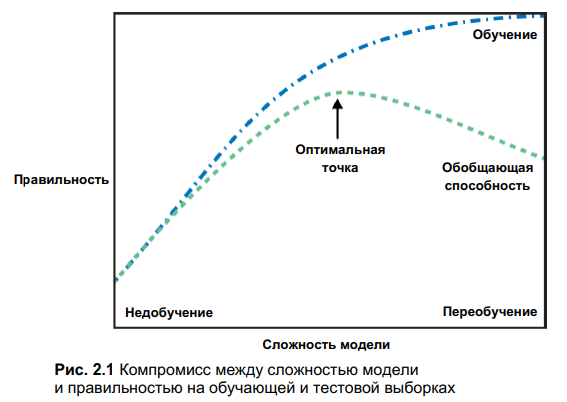

## Взаимосвязь между сложностью модели и размером набора данных

Важно отметить, что сложность модели тесно связана с изменчивостью
входных данных, содержащихся в вашем обучающем наборе: чем больше
разнообразие точек данных в вашем наборе, тем более сложную модель
можно использовать, не беспокоясь о переобучении.

# Алгоритмы машинного обучения с учителем

## Некоторые наборы данных

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


Мы
более детально проанализируем набор данных, учтя не только 13
измерений в качестве входных признаков, но и приняв во внимание все
взаимодействия
(interactions) между признаками. Иными словами, мы
будем учитывать в качестве признаков не только уровень преступности
и удаленность от радиальных магистралей по отдельности, но и
взаимодействие уровень преступности–удаленность от радиальных
магистралей. Включение производных признаков называется
конструированием признаков (feature engineering).

In [3]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## Метод k ближайших соседей

Алгоритм k ближайших соседей, возможно, является самым простым
алгоритмом машинного обучения. Построение модели заключается в
запоминании обучающего набора данных. Для того, чтобы сделать
прогноз для новой точки данных, алгоритм находит ближайшие к ней
точки обучающего набора, то есть находит «ближайших соседей».

### Классификация с помощью k соседей

D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


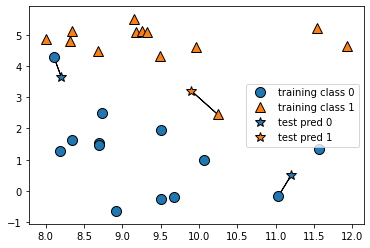

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Рис. 2.4 Прогнозы, полученные для набора данных forge
с помощью модели одного ближайшего соседа

Когда мы
рассматриваем более одного соседа, для присвоения метки используется
голосование
(voting). Это означает, что для каждой точки тестового
набора мы подсчитываем количество соседей, относящихся к классу 0, и
количество соседей, относящихся к классу 1. Затем мы присваиваем
точке тестового набора наиболее часто встречающийся класс: другими
словами, мы выбираем класс, набравший большинство среди k
ближайших соседей.

D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


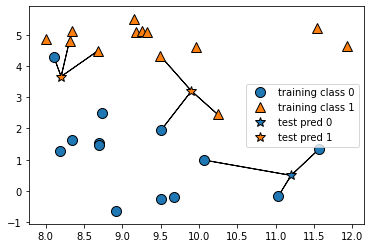

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Рис. 2.5 Прогнозы, полученные для набора данных forge
с помощью модели трех ближайших соседей

Применение алгоритма k ближайших соседей:

In [6]:
from sklearn.model_selection import train_test_split

# Присваиваем переменным объектов и ответов свои значения
X, y = mglearn.datasets.make_forge()

# Перемешиваем и разбиваем на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [7]:
# берем модель k ближайших соседей с k = 3
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
# тренируем модель
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
print("Прогноз на тестовом наборе:", clf.predict(X_test))

Прогноз на тестовом наборе: [1 0 1 0 1 0 0]


In [10]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Правильность на тестовом наборе: 0.86


### Анализ работы класса KNeighborsClassifier

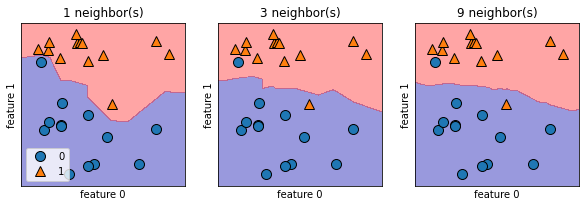

In [11]:
# Графики границ принятия решений
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Рис. 2.6 Границы принятия решений, созданные моделью
ближайших соседей для различных значений n_neighbors

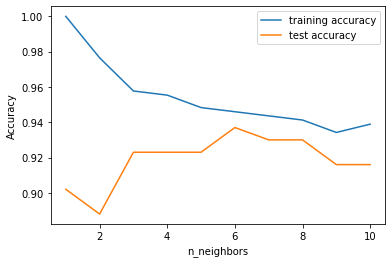

In [12]:
# Построим графики зависимости точности от количества k-соседей
# k_max = 10
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Рис. 2.7 Сравнение правильности на обучающем и тестовом наборах
как функции от количества соседей

Правильность на
тестовом наборе в случае использования одного соседа ниже, чем при
использовании нескольких соседей. Это указывает на то, что использование одного ближайшего соседа приводит к построению
слишком сложной модели. С другой стороны, когда используются 10
соседей, модель становится слишком простой и она работает еще хуже.
Оптимальное качество работы модели наблюдается где-то посередине,
когда используются шесть соседей. Однако посмотрим на шкалу y.
Худшая по качеству модель дает правильность на тестовом наборе около
88%, что по-прежнему может быть приемлемым результатом.

### Регрессия k ближайших соседей

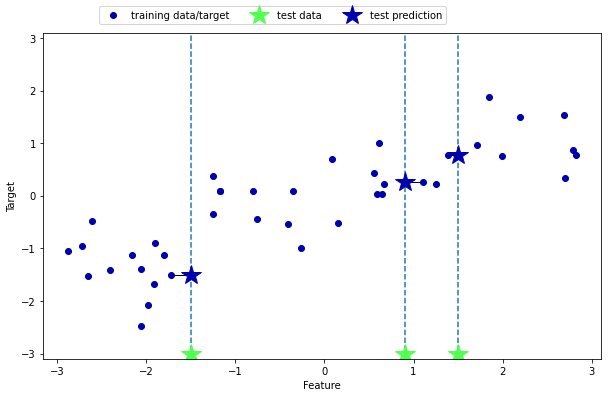

In [13]:
# k = 1
mglearn.plots.plot_knn_regression(n_neighbors=1)

Рис. 2.8 Прогнозы, полученные с помощью регрессионной модели
одного ближайшего соседа для набора данных wave

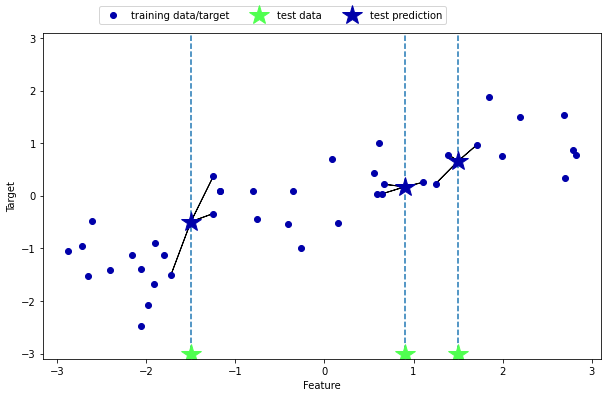

In [14]:
# k = 3
mglearn.plots.plot_knn_regression(n_neighbors=3)

Рис. 2.8 Прогнозы, полученные с помощью регрессионной модели
трех ближайших соседей для набора данных wave

Алгоритм регрессии k ближайших соседей реализован в классе
KNeighborsRegressor. Он используется точно так же, как
KNeighborsClassifier:

In [15]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)

# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

А теперь получим прогнозы для тестового набора.

In [16]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Кроме того, мы можем оценить качество модели с помощью метода
score, который для регрессионных моделей возвращает значение $R^2$ (коэффициент детерминации).
- Значение 1 соответствует идеальной прогнозирующей способности, а
значение 0 соответствует константе модели, которая лишь предсказывает
среднее значение ответов в обучающем наборе, y_train

In [17]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


### Анализ модели KNeighborsRegressor

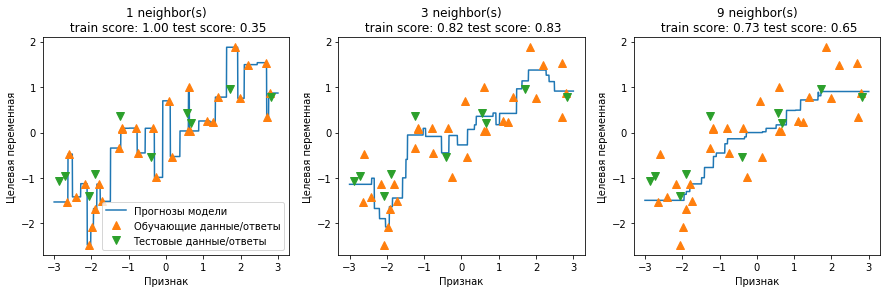

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # получаем прогнозы, используя 1, 3, и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.plot(X_test, y_test, 'v', markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
"Тестовые данные/ответы"], loc="best")

Рис. 2.10 Сравнение прогнозов, полученных с помощью регрессии ближайших
соседей для различных значений n_neighbors

- $train$ $score$ показывает сложность модели: 1.00 - Самая сложная модель, <1.00 - более простая модель
- $test$ $score$ показывает правильность (успешность) (обобщающую способность)  модели (на тренировочных данных, насколько я понял)

### Преимущества, недостатки и параметры

- В принципе, в классификаторе KNeighbors есть два важных параметра:
количество соседей (обычно 3-5) и мера расстояния между точками данных (по умолчанию используется евклидово
расстояние, которое хорошо работает во многих ситуациях).
- Одним из преимуществ метода ближайших соседей является то, что
эту модель очень легко интерпретировать и, как правило, этот метод дает
приемлемое качество без необходимости использования большого
количества настроек.
- Он является хорошим базовым алгоритмом,
который нужно попробовать в первую очередь, прежде чем
рассматривать более сложные методы. 
- несмотря на то что алгоритм ближайших соседей легко интерпретировать, на практике он не часто используется из-за
скорости вычислений и его неспособности обрабатывать большое
количество признаков.

## Линейные модели

### Линейные модели для регрессии

- Линейные модели для регрессии можно охарактеризовать как
регрессионные модели, в которых прогнозом является прямая линия для
одного признака, плоскость, когда используем два признака, или
гиперплоскость для большего количества измерений (то есть, когда
используем много признаков)
- Существует различные виды линейных моделей для регрессии.
Различие между этими моделями заключается в способе оценивания
параметров модели w и b по обучающим данным и контроле сложности
модели.

### Линейная регрессия (обычный метод наименьших квадратов (МНК))

Линейная регрессия или обычный метод наименьших квадратов
(ordinary least squares, OLS) – это самый простой и наиболее
традиционный метод регрессии. Линейная регрессия находит параметры
w и b, которые минимизируют среднеквадратическую ошибку (mean
squared error) между спрогнозированными и фактическими ответами у в
обучающем наборе. 

In [19]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

- Параметры «наклона» (w), также называемые весами или коэффициентами (coefficients), хранятся в атрибуте $coef_$, тогда как сдвиг offset) или константа (intercept), обозначаемая как b, хранится в атрибуте $intercept_$:
- Атрибут $intercept_$ - это всегда отдельное число с плавающей точкой,
тогда как атрибут $coef_$ - это массив NumPy, в котором каждому
элементу соответствует входной признак.
- Замечание: Библиотека scikit-learn
всегда хранит все, что является производным от обучающих
данных, в атрибутах, которые заканчиваются символом
подчеркивания.

In [20]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973


- метод $score$ вычисляет правильность модели для тестового/тренировочного набора (Коэфф. детерм.):

In [21]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


Значение $R^2$ в районе 0.66 указывает на не очень хорошее качество
модели, однако можно увидеть, что результаты на обучающем и тестовом
наборах очень схожи между собой. Возможно, это указывает на
недообучение.
Для этого одномерного массива данных
опасность переобучения невелика, поскольку модель очень проста. Однако для высокоразмерных наборов данных линейные модели становятся более
сложными и существует более высокая вероятность переобучения.

Рассмотрим более сложный набор данных (105 признаков):

In [22]:
# Загружаем/тренируем модель
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [23]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


При сравнении правильности на обучающем и тестовом наборах
выясняется, что мы очень точно предсказываем на обучающем наборе,
однако $R^2$ на тестовом наборе имеет довольно низкое значение.\
Это несоответствие между правильностью на обучающем наборе и
правильностью на тестовом наборе является явным признаком
$переобучения$ и поэтому мы должны попытаться найти модель, которая
позволит нам контролировать сложность.

### Гребневая регрессия (или ридж-регрессия)

- Гребневая регрессия также является линейной моделью регрессии,
поэтому ее формула аналогична МНК
- В гребневой регрессии коэффициенты (w)
выбираются не только с точки зрения того, насколько хорошо они
позволяют предсказывать на обучающих данных, они еще подгоняются в
соответствии с дополнительным ограничением (нам нужно, чтобы
величина коэффициентов была как можно меньше, т.е. все
элементы w должны быть близки к нулю)
- Каждый
признак должен иметь как можно меньшее влияние на результат (то есть
каждый признак должен иметь небольшой регрессионный коэффициент)
и в то же время он должен по-прежнему обладать хорошей прогнозной
силой

- Это ограничение является примером $регуляризации$
- $Регуляризация$ означает явное ограничение модели для
предотвращения переобучения.
- $Регуляризация$, использующаяся в
гребневой регрессии, известна как $L2$ $регуляризация$

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


- гребневая регрессия - модель с более строгим ограничением, поэтому меньше вероятность
переобучения.
- менее сложная модель означает меньшую правильность
на обучающем наборе

- Компромисс между простотой модели и качеством
работы на обучающем наборе может быть задан пользователем при
помощи параметра alpha.
- по умолчанию alpha=1.0
- Увеличение alpha заставляет коэффициенты сжиматься
до близких к нулю значений, что снижает качество работы модели на
обучающем наборе, но может улучшить ее обобщающую способность
- При очень малых значениях alpha,
ограничение на коэффициенты практически не накладывается и мы в
конечном итоге получаем модель, напоминающую линейную регрессию

- Т.е. чем больше alpha, тем меньше коэффициенты, тем проще модель

In [25]:
# alpha=10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

print()

# alpha=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64

Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


Построим графики (кривые обучения) качества работы модели прификсированном $alpha$ в виде функции от объема набора данных:

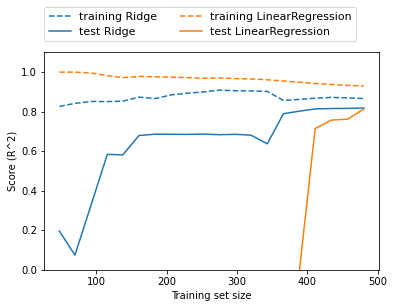

In [26]:
mglearn.plots.plot_ridge_n_samples()

Рис. 2.13 Кривые обучения гребневой регрессии и
линейной регрессии для набора данных Boston Housing

- Урок здесь состоит в том, что
при достаточном объеме обучающих данных регуляризация становится
менее важной и при удовлетворительном объеме данных гребневая и
линейная регрессии будут демонстрировать одинаковое качество работы

### Лассо-регрессия

- $Регуляризация$, использующаяся в
гребневой регрессии, известна как $L1$ $регуляризация$
- при использовании лассо некоторые
коэффициенты становятся равны точно нулю
- т.е. некоторые признаки полностью исключаются из модели

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.29
Правильность на контрольном наборе: 0.21
Количество использованных признаков: 4


- Получились очень маленькие значения => $недообучение$
- Из 105 исходных признаков в работе модели было использовано только 4 (остальные, видимо, = 0) => $недообучение$

In [28]:
# Чтобы снизить недообучение, давайте попробуем уменьшить alpha.
# При этом нам нужно увеличить значение max_iter (максимальное количество итераций) 

# мы увеличиваем значение "max_iter",
# иначе модель выдаст предупреждение, что нужно увеличить max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


- если мы установим слишком низкое значение alpha, мы получим в конечном итоге
переобучение:

In [29]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.64
Количество использованных признаков: 96


- Сравнение Гребневой и лассо регрессий

Text(0, 0.5, 'Оценка коэффициента')

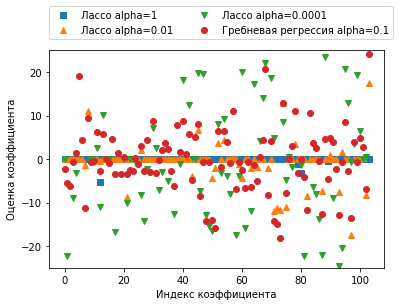

In [30]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

- На практике, когда стоит выбор между гребневой регрессией и лассо,
предпочтение, как правило, отдается гребневой регрессии.
- Однако, если
у вас есть большое количество признаков и есть основания считать, что
лишь некоторые из них важны, Lasso может быть оптимальным выбором
- Аналогично, если вам нужна легко интерпретируемая модель, Lasso
поможет получить такую модель, так как она выберет лишь
подмножество входных признаков

### Линейные модели для задач классификации

- Как уже говорилось выше, Для линейных моделей регрессии выход yˆ является линейной
функцией признаков: линией, плоскостью или гиперплоскостью (для
большого количества измерений).
- Для линейных моделей
классификации граница принятия решений (decision boundary) является
линейной функцией аргумента. Другими словами, (бинарный) линейный
классификатор – это классификатор, который разделяет два класса с
помощью линии, плоскости или гиперплоскости.

Существует масса алгоритмов обучения линейных моделей. Различия между алгоритмами задают два критерия:
- Измеряемые метрики качества подгонки обучающих данных;
- Факт использования регуляризации и вид регуляризации, если она
используется.

- невозможно скорректировать w и b, чтобы минимизировать количество
неверно классифицированных случаев, выдаваемое алгоритмами

D:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
D:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


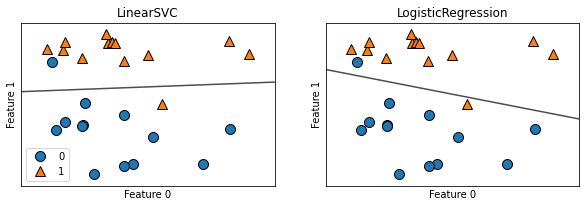

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Двумя наиболее распространенными алгоритмами линейной
классификации являются:
- $логистическая$ $регрессия$ (logistic regression),
реализованная в классе linear_model.LogisticRegression
- $линейный$
$метод$ $опорных$ $векторов$
(linear support vector machines) или линейный
SVM, реализованный в классе svm.LinearSVC 

- Для LogisticRegression и LinearSVC компромиссный параметр,
который определяет степень регуляризации, называется C, и более
высокие значения C соответствуют меньшей регуляризации.
- Другими
словами, когда вы используете высокое значение параметра C,
LogisticRegression и LinearSVC пытаются подогнать модель к
обучающим данным как можно лучше, тогда как при низких значениях
параметра C модели делают больший акцент на поиске вектора
коэффициентов (w), близкого к нулю
- По умолчанию C = 1

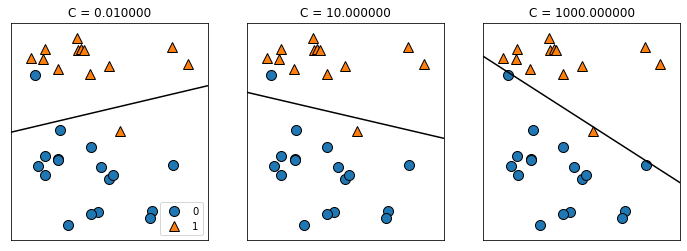

In [32]:
mglearn.plots.plot_linear_svc_regularization()

- Модель на графике справа старается изо всех сил
правильно классифицировать все точки, но не может дать хорошего
обобщения сразу для обоих классов. Другими словами, эта модель скорее
всего $переобучена$.

In [33]:
# Рассмотрим пример логистической регрессии
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter = 100000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.958
Правильность на тестовом наборе: 0.958


---------------------------

- Оценим качество по кросс-валидации 

In [34]:
# Тренируем модель
log_regressor = linear_model.LogisticRegression(C = 100, random_state = 2, max_iter = 100000)
log_regressor.fit(X_train, y_train)

# Применяем кросс валидацию
lr_scoring = model_selection.cross_val_score(log_regressor, X_train, y_train, scoring = 'accuracy', cv = 10)

# Значения 10 правильностей на тренировочном/тестовом (сам хз) наборе
print(lr_scoring)
print()
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

[0.97674419 1.         0.97674419 0.95348837 0.93023256 0.95348837
 0.92857143 0.95238095 0.95238095 1.        ]

Log mean:0.9624031007751939, max:1.0, min:0.9285714285714286, std:0.02403693962541919


In [102]:
# Функция predict_proba показывает для каждого элемента какова вероятность
# быть отнесенным к каждому из двух классов
# lr_proba_predictions = logreg.predict_proba(X_test)
# print(lr_proba_predictions)

---

Выставленное по умолчанию значение C = 1 дает неплохой результат, но тк значения близки, то вероятно недообучение.\
Увеличим значение C

In [36]:
logreg100 = LogisticRegression(C=100, max_iter = 100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.981
Правильность на тестовом наборе: 0.965


Значения стали лучше, значит, мы были правы\

In [37]:
# Рассмотрим ради интереса C = 0.01
logreg001 = LogisticRegression(C=0.01, max_iter = 100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.953
Правильность на тестовом наборе: 0.951


Посмотрим на коэффициенты логистической
регрессии, полученные с использованием трех различных значений
параметра регуляризации C:

- В данном случае, насколько я понял, у нас датасет опухолей и их 30 признаков. В датасете данные 569 опухолей, для каждой из которой известно, злокачественная она или безвредная, и нужно определить для новых опухолей, является ли опухоли злокачественными или нет. У нас получается 30-мерное пространство, в котором мы строим 30-мерную плоскость, которая отделяет злокачественную опухоль от безвредной. После чего мы можем брать тестовые опухоли и если опухоль выше/ниже нашей 30-мерной плоскости, то опухоль злокачественная/безвредная

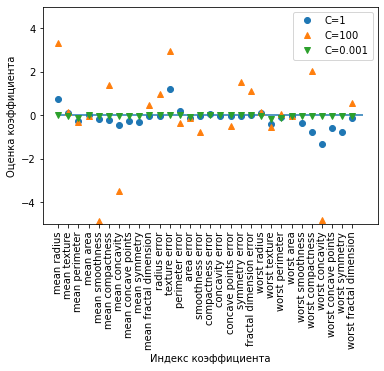

In [38]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

- Высокое значение признака «texture error» связано
с примером, классифицированным как «злокачественный».
- Однако изменение знака коэффициента для признака «mean
perimeter» означает, что в зависимости от рассматриваемой
модели высокое значение «mean perimeter» может указывать либо
на доброкачественную, либо на злокачественную опухоль.
- Приведенный пример показывает, что интерпретировать
коэффициенты линейных моделей всегда нужно с осторожностью
и скептицизмом.

Если мы хотим получить более интерпретабельную модель, нам может
помочь $L1$ регуляризация, поскольку она ограничивает модель
использованием лишь нескольких признаков. Ниже приводится график
с коэффициентами и оценками правильности для $L1$ регуляризации:

Правильность на обучении для логрегрессии l1 с C=0.001: 0.91
Правильность на тесте для логрегрессии l1 с C=0.001: 0.92
Правильность на обучении для логрегрессии l1 с C=1.000: 0.96
Правильность на тесте для логрегрессии l1 с C=1.000: 0.96
Правильность на обучении для логрегрессии l1 с C=100.000: 0.99
Правильность на тесте для логрегрессии l1 с C=100.000: 0.98


Text(0.5, 1.0, 'Коэффициенты логистической регрессии с L1 штрафом \n для набора данных Breast Cancer (использовались различные значения C)')

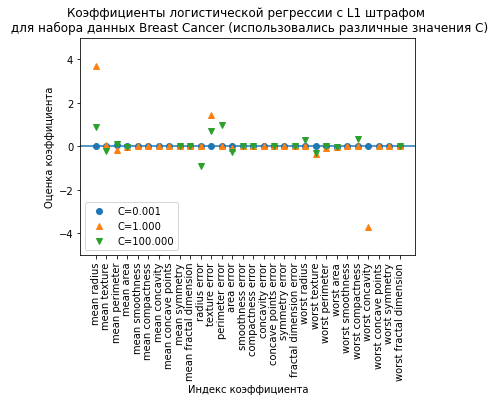

In [39]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1", max_iter = 100000).fit(X_train, y_train)
    print("Правильность на обучении для логрегрессии l1 с C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Правильность на тесте для логрегрессии l1 с C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.title('Коэффициенты логистической регрессии с L1 штрафом \n для набора данных Breast Cancer (использовались различные значения C)')

In [40]:
lr_l1.coef_

array([[ 8.83126957e-01, -1.93856736e-01,  1.20716358e-01,
        -5.55480182e-03, -1.24339608e+01,  6.55677691e+01,
        -5.12127669e+00, -8.71984802e+01,  0.00000000e+00,
         0.00000000e+00, -8.96853730e-01,  7.28711359e-01,
         9.73407672e-01, -2.48128281e-01,  0.00000000e+00,
         0.00000000e+00,  3.66855133e+01,  0.00000000e+00,
         3.48874380e+01,  0.00000000e+00,  3.10726320e-01,
        -3.03884152e-01,  3.69616344e-02, -2.26978552e-02,
        -5.02875308e+01,  3.65657494e-01, -1.06477127e+01,
        -4.51049459e+01, -1.95749659e+01,  0.00000000e+00]])

Существует много параллелей между линейными
моделями для бинарной классификации и линейными моделями для
регрессии. Как и в регрессии, основное различие между моделями – в
параметре penalty, который влияет на регуляризацию и определяет,
будет ли модель использовать все доступные признаки или выберет лишь
подмножество признаков.

### Линейные модели для мультиклассовой классификации

- Общераспространненный подход, позволяющий
распространить алгоритм бинарной классификации на случай
мультиклассовой классификации называет подходом «один против
остальных»
- В подходе «один против остальных» для
каждого класса строится бинарная модель, которая пытается отделить этот класс от всех остальных, в результате чего количество моделей
определяется количеством классов.
- Для получения прогноза точка
тестового набора подается на все бинарные классификаторы. Классификатор, который выдает по своему классу наибольшее значение,
«побеждает» и метка этого класса возвращается в качестве прогноза.

[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]]

[2 1 0 1 2]


Text(0.5, 1.0, 'Двумерный синтетический набор данных, содержащий три класса')

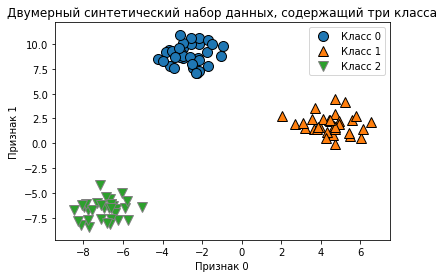

In [41]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print(X[:5])
print()
print(y[:5])
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])
plt.title('Двумерный синтетический набор данных, содержащий три класса')

Теперь обучаем классификатор LinearSVC на этом наборе данных:

In [42]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


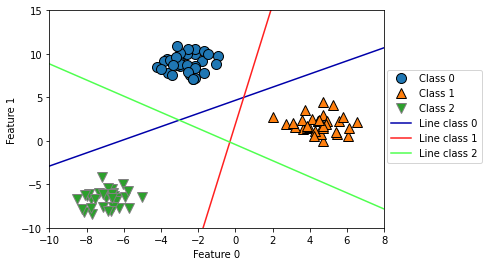

In [43]:
# Визуализируем границы принятия решений
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Все три
бинарных классификатора относят точки, расположенные в середине графика, к
«остальным». Какой класс будет присвоен точке, расположенной в
треугольнике? Ответ – класс, получивший наибольшее значение по
формуле классификации, то есть класс ближайшей линии

Text(0.5, 1.0, 'Мультиклассовые границы принятия решений, полученные с помощью \n трех бинарных классификаторов в рамках подхода «один против остальных» \n С использованием LinearSVC (Линейный метод опорных векторов)')

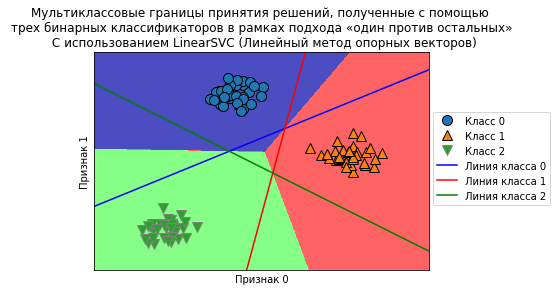

In [44]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
    ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
    'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.title('Мультиклассовые границы принятия решений, полученные с помощью \n трех бинарных классификаторов в рамках подхода «один против остальных» \n С использованием LinearSVC (Линейный метод опорных векторов)')

### Преимущества, недостатки и параметры

- Основной параметр линейных моделей – параметр регуляризации,
называемый alpha в моделях регрессии и C в LinearSVC и
LogisticRegression. 
- Большие значения alpha или маленькие значения C
означают простые модели
- Конкретно для регрессионных моделей
настройка этих параметров имеет весьма важное значение. 
- Как правило,
поиск C и alpha осуществляется по логарифмической шкале. 

- Если вы полагаете, что на самом деле важны лишь некоторые
признаки, следует использовать L1 регуляризацию, а также если интерпретируемость модели имеет важное
значение. Поскольку L1 регуляризация будет использовать лишь
несколько признаков, легче будет объяснить, какие признаки важны для
модели и каковы эффекты этих признаков.
- В противном случае используйте
установленную по умолчанию L2 регуляризацию.

In [45]:
# Выбрать модель, обучить её и предсказать значения можно в одну строчку:
# y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

## Наивные байесовские классификаторы

- Наивные байесовские классификаторы представляют собой семейство
классификаторов, которые очень схожи с линейными моделями,
рассмотренными в предыдущем разделе. Однако они имеют тенденцию
обучаться быстрее.
- Цена, которую приходится платить за такую
эффективность – немного более низкая обобщающая способность
моделей Байеса по сравнению с линейными классификаторами типа
LogisticRegression и LinearSVC.
- Причина, по которой наивные байесовские модели столь эффективны,
заключается в том, что они оценивают параметры, рассматривая каждый
признак отдельно и по каждому признаку собирают простые статистики
классов.

В scikit-learn реализованы три вида наивных байесовских
классификаторов: GaussianNB, BernoulliNB и MultinomialNB:
- GaussianNB
можно применить к любым непрерывным данным
- BernoulliNB принимает бинарные данные
- MultinomialNB принимает
счетные или дискретные данные

BernoulliNB и MultinomialNB в основном используются
для классификации $текстовых$ данных.

MultinomialNB принимает в расчет среднее значение каждого признака
для каждого класса, в то время как GaussianNB записывает среднее
значение, а также стандартное отклонение каждого признака для каждого
класса.

MultinomialNB и BernoulliNB имеют один параметр alpha, который
контролирует сложность модели. Параметр alpha работает следующим
образом:
- Алгоритм добавляет к данным зависящее от alpha определенное
количество искусственных наблюдений с положительными значениями
для всех признаков. Это приводит к «сглаживанию» статистик.
- Большее
значение alpha означает более высокую степень сглаживания, что
приводит к построению менее сложных моделей.
- Тонкая настройка этого параметра обычно немного увеличивает
правильность.

GaussianNB в основном используется для данных с очень высокой
размерностью, тогда как остальные наивные байесовские модели широко
используются для разреженных дискретных данных, например, для
текста. 

MultinomialNB обычно работает лучше, чем BernoulliNB, особенно
на наборах данных с относительно большим количеством признаков,
имеющих ненулевые частоты (т.е. на больших документах).

## Деревья решений

Деревья решений являются моделями, широко используемыми для
решения задач классификации и регрессии. По сути они задают вопросы
и выстраивают иерархию правил «если… то», приводящую к решению.

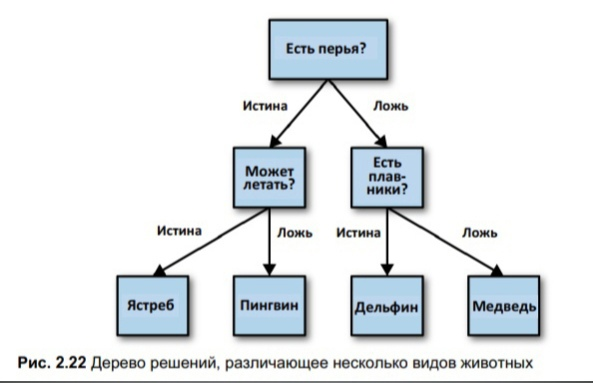

Список определений:
- $Лист$ (терминальный узел) - узел, который содержит окончательный ответ
- Построение дерева решений означает построение последовательности
правил «если… то…», которая приводит нас к истинному ответу
максимально коротким путем. В машинном обучении эти правила
называются $тестами$ (развилки)
- $Корень$ - верхний узел
- $Чистый$ $лист$ - лист дерева, который содержит
точки данных, относящиеся к одному и тому же значению целевой
переменной

### Построение деревьев решений

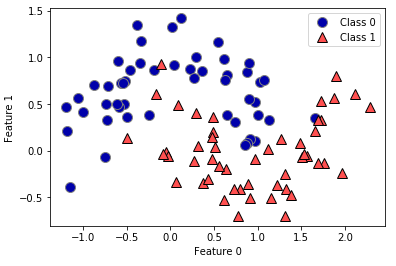

- Рекурсивный процесс строит в итоге бинарное дерево решений,
в котором каждый узел соответствует определенному тесту.
- Рекурсивное разбиение данных повторяется до тех пор, пока все точки
данных в каждой области разбиения (каждом листе дерева решений) не
будут принадлежать одному и тому же значению целевой переменной
(классу или количественному значению) P.S.: но это грозит переобучениием. 

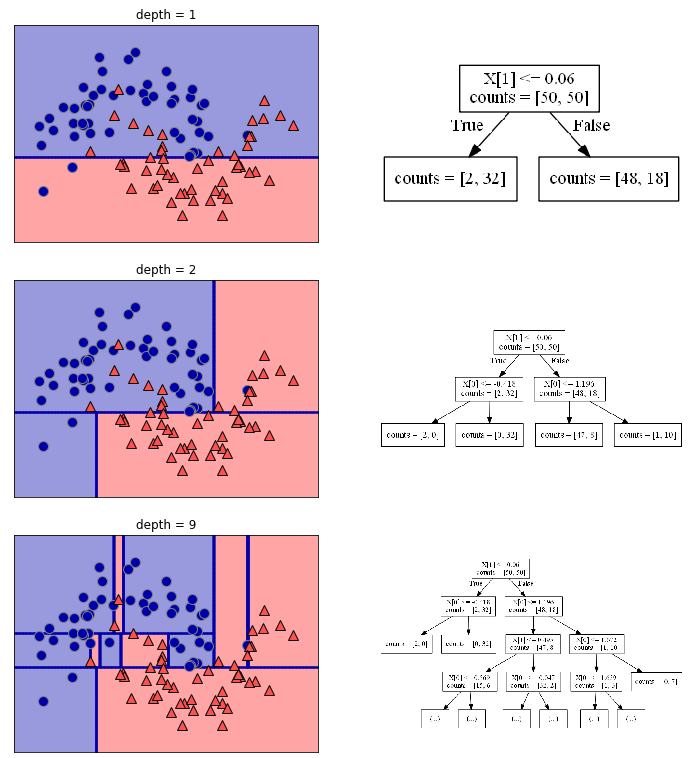

Прогноз для новой точки данных получают следующим образом:
- выясняют, в какой области разбиения пространства признаков
находится данная точка
- определяют класс, к которому относится
большинство точек в этой области (либо единственный класс в области,
если лист является чистым)

Кроме того, можно использовать деревья для решения задач
регрессии, используя точно такой же подход. Для получения прогноза
мы обходим дерево на основе тестов в каждом узле и находим лист, в
который попадает новая точка данных. Выходом для этой точки данных
будет значение целевой переменной, $усредненное$ по всем обучающим
точкам в этом листе.

### Контроль сложности деревьев решений

- Как правило, построение дерева, описанное здесь и продолжающееся до
тех пор, пока все листья не станут чистыми, приводит к получению
моделей, которые являются очень сложными и характеризуются
сильным переобучением на обучающих данных. 
- Наличие чистых листьев означает, что дерево имеет 100%-ную правильность на обучающей выборке

Переобучение можно увидеть в
левой части последнего рисунка

Есть две общераспространенные стратегии, позволяющие
предотвратить переобучение:
- $Предварительная$ $обрезка$ - ранняя остановка
построения дерева. Возможные критерии
предварительной обрезки включают в себя:
-- ограничение максимальной
глубины дерева
-- ограничение максимального количества листьев
-- минимальное количество наблюдений в узле, необходимое для
разбиения
- $Пост-обрезка$ (просто $обрезка$) - построение дерева с последующим удалением или
сокращением малоинформативных узлов

В scikit-learn реализована лишь предварительная обрезка.

In [46]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


- Как и следовало ожидать, правильность на обучающем наборе
составляет 100%, поскольку листья являются чистыми.
- Правильность на тестовом наборе немного
хуже, чем при использовании ранее рассмотренных линейных моделей,
правильность которых составляла около 95%.

- Теперь
давайте применим к дереву предварительную обрезку, которая остановит
процесс построения дерева до того, как мы идеально подгоним модель к
обучающим данным.
- Ограничение глубины
дерева уменьшает переобучение.
- Здесь мы
установим max_depth=4, то есть можно задать только четыре
последовательных вопроса. 
- Это приводит к более низкой
правильности на обучающем наборе, но улучшает правильность на
тестовом наборе:

In [47]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### Анализ деревьев решений

Не удалось установить библиотеку graphviz

### Важность признаков в  деревьях

- Вместо того, чтобы просматривать все дерево, есть некоторые полезные параметры, которые мы
можем использовать как итоговые показатели работы дерева. 
- Наиболее
часто используемым показателем является важность признаков (feature
importance), которая оценивает, насколько важен каждый признак с точки зрения получения решений
- Это число варьирует в диапазоне от 0
до 1 для каждого признака, где 0 означает «не используется вообще», а 1
означает, что «отлично предсказывает целевую переменную».
- Важности
признаков в сумме всегда дают 1:

In [48]:
print("Важности признаков:\n{}".format(tree.feature_importances_))

Важности признаков:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [49]:
# более наглядный вариант:
for name, score in zip(cancer["feature_names"], tree.feature_importances_):
    print(name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


Мы можем визуализировать важности признаков аналогично тому,
как мы визуализируем коэффициенты линейной модели:


30


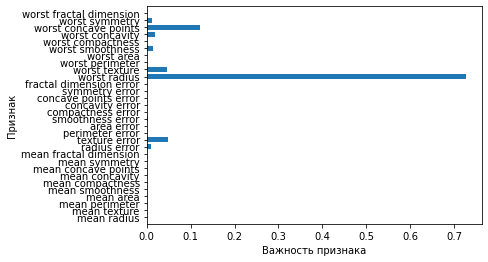

In [50]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    print(n_features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names) # подписи у оси y
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    plt.ylim(-1, n_features) # ограничение по оси y снизу

plot_feature_importances_cancer(tree)

- Важности признаков говорят нам, что «worst
radius» важен, но мы не знаем, является ли высокое значение радиуса
признаком доброкачественной или злокачественной опухоли.
- Найти такую очевидную взаимосвязь между признаками и классом
невозможно.

Теперь рассмотрим DecisionTreeRegressor:
-  DecisionTreeRegressor (и
все остальные регрессионные модели на основе дерева) не умеет
экстраполировать или делать прогнозы вне диапазона значений
обучающих данных.

Пример: Сравним две модели: DecisionTreeRegressor и
LinearRegression:
- В данном случае мы не будем перемешивать данные, и возьмем тренировочные данные < 2000 года а тестовые >=2000 года и будем предсказывать тестовые; Мы не перемешиваем, чтобы показать, что в таком случае DecisionTreeRegressor не сможет предсказать данные, т.к. они выходят за диапазон обучающих значений

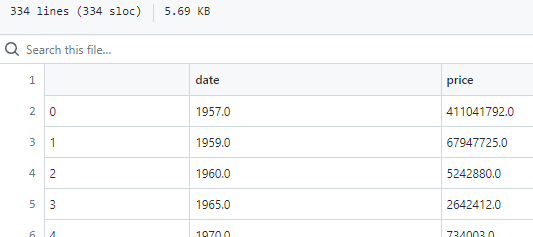

Text(0, 0.5, 'Цена $/Мбайт')

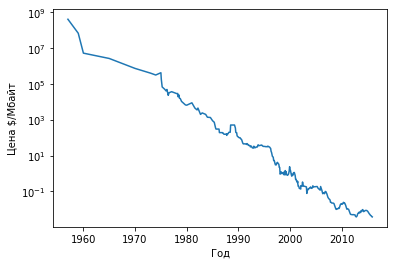

In [51]:
# Шкала логарифмическая
ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт")

In [52]:
from sklearn.tree import DecisionTreeRegressor
# используем исторические данные для прогнозирования цен после 2000 года
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# прогнозируем цены по датам
X_train = data_train.date[:, np.newaxis]
# мы используем логпреобразование, чтобы получить простую взаимосвязь между данными и откликом
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# прогнозируем по всем данным
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# экспоненцируем, чтобы обратить логарифмическое преобразование
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_19856/1451696219.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_19856/1451696219.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


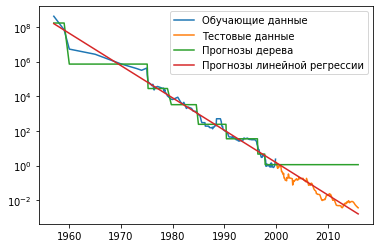

In [53]:
plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева")
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии")
plt.legend()

- Здесь мы
не ограничивали сложность дерева, поэтому она полностью запомнила
весь набор данных.
- Однако, как только мы выходим из диапазона
значений, известных модели, модель просто продолжает предсказывать
последнюю известную точку.
- Дерево не способно генерировать «новые»
ответы, выходящие за пределы значений обучающих данных.

### Преимущества, недостатки и параметры

Обычно, чтобы предотвратить переобучение, достаточно выбрать одну из стратегий предварительной
обрезки:
- max_depth
- max_leaf_nodes
- min_samples_leaf

Преимущества деревьев:
- Полученная модель
может быть легко визуализирована и понята неспециалистами (по
крайней мере это верно для небольших деревьев)
- Деревья не требуют
масштабирования данных. Поскольку каждый признак обрабатывается
отдельно, а возможные разбиения данных не зависят от
масштабирования, алгоритмы деревьев решений не нуждаются в таких
процедурах предварительной обработки, как нормализация или
стандартизация признаков. 

Основной недостаток деревьев:
- Даже при
использовании предварительной обрезки, деревья склонны к переобучению
и имеют низкую обобщающую способность.

Деревья решений хорошо работают, когда у
вас есть признаки, измеренные в совершенно разных шкалах, или когда
ваши данные представляют смесь бинарных и непрерывных признаков.

В большинстве
случаев, как правило, вместо одиночного дерева решений используются
ансамбли деревьев.

## Ансамбли деревьев

Ансамбли (ensembles) – это методы, которые сочетают в себе множество
моделей машинного обучения, чтобы в итоге получить более мощную
модель.

Есть две ансамблевых модели, которые
доказали свою эффективность на самых различных наборах данных для
задач классификации и регрессии, обе используют деревья решений в
качестве строительных блоков:
- случайный лес деревьев решений
- градиентный бустинг деревьев решений

### Ансамбль "Случайный лес"

- случайный лес – это набор
деревьев решений, где каждое дерево немного отличается от остальных
- Случайный лес является одним
из способов решения проблемы переобучения
- Построив много деревьев, которые хорошо работают и
переобучаются с разной степенью, мы можем уменьшить переобучение
путем усреднения их результатов
- Каждое дерево должно на
приемлемом уровне прогнозировать целевую переменную и должно
отличаться от других деревьев

#### Построение случайного леса

Определения:
- n_estimators - параметр, определяющий количество деревьев для
классов RandomForestRegressor или RandomForestClassifier
- n_samples - количество значений в бутстреп-выборке
- max_features - контролирует количество различных отбираемых признаков
- n_features - количество различных признаков во всем мешке

Для построения дерева мы сначала сформируем
бутстреп-выборку наших данных:
-  Из n_samples
примеров мы случайным образом выбираем пример с возвращением
n_samples раз (поскольку отбор с возвращением, то один и тот же пример
может быть выбран несколько раз)
- Мы получаем выборку, которая
имеет такой же размер, что и исходный набор данных, однако некоторые
примеры будут отсутствовать в нем (примерно одна треть), а некоторые
попадут в него несколько раз

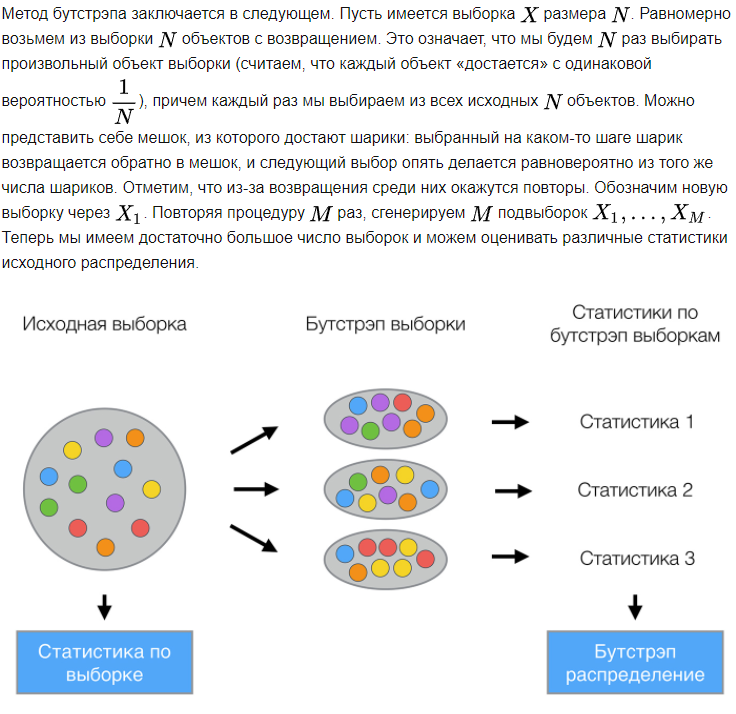

Пример:
- предположим, что мы хотим создать
бутстреп-выборку списка ['a', 'b', 'c', 'd']. Возможная бутстреп-выборка может выглядеть как ['b', 'd', 'd', 'c']. Другой возможной
бутстреп-выборкой может быть ['d', 'a', 'd', 'a'].
- т.е.  в первом случае мы сначала вытащили b, записали что взяли b и вернули b в мешок, затем вытащили d и так далее.
- в данных премерах, насколько я понял, количество различных отбираемых признаков
(max_features) == 3 (судя по первому примеру это b,d,c, т.е. 3);
- n_features это количество различных признаков в мешке (a,b,c,d) == 4;
- n_samples количество значений в бутстреп-выборке, в данном случае оно равно количеству значений в мешке == 4

- Использование бутстрепа приводит к тому, что деревья решений в
случайном лесе строятся на немного отличающихся между собой бутстреп-выборках
- Из-за случайного отбора признаков в каждом узле
все расщепления в деревьях будут основано на отличающихся
подмножествах признаков. 

Критическим параметром в этом процессе является max_features:
- Если мы установим max_features равным n_features, это будет означать,
что в каждом разбиении могут участвовать все признаки набора данных,
и в отбор признаков не будет привнесена случайность (впрочем,
случайность в силу использования бутстрепа остается).
Таким образом, высокое значение
max_features означает, что деревья в случайном лесе будут весьма схожи
между собой и они смогут легко аппроксимировать данные, используя
наиболее дискриминирующие признаки.
- Если мы
установим max_features равным 1, это означает, что при разбиении не
будет никакого отбора признаков для тестирования вообще, будет
осуществляться поиск с учетом различных пороговых значений для
случайно выбранного признака. Низкое значение max_features
означает, что деревья в случайном лесе будут сильно отличаться друг от
друга и, возможно, каждое дерево будет иметь очень большую глубину,
чтобы хорошо соответствовать данным.

Чтобы дать прогноз для случайного леса, алгоритм сначала дает
прогноз для каждого дерева в лесе:
- Для регрессии мы можем усреднить эти результаты, чтобы получить наш окончательный прогноз
- Для
классификации используется стратегия «мягкого голосования». Это
означает, что каждый алгоритм дает «мягкий» прогноз, вычисляя
вероятности для каждого класса. Эти вероятности усредняются по всем
деревьям и прогнозируется класс с наибольшей вероятностью.

#### Анализ случайного леса

Давайте применим случайный лес, состоящий из пяти деревьев, к набору
данных two_moons:

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=1500, random_state=2, n_jobs = -1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1500, n_jobs=-1, random_state=2)

Деревья, которые строятся в рамках случайного леса, сохраняются в
атрибуте estimator_. Давайте визуализируем границы принятия
решений, полученные каждым деревом, а затем выведем агрегированный
прогноз, выданный лесом:

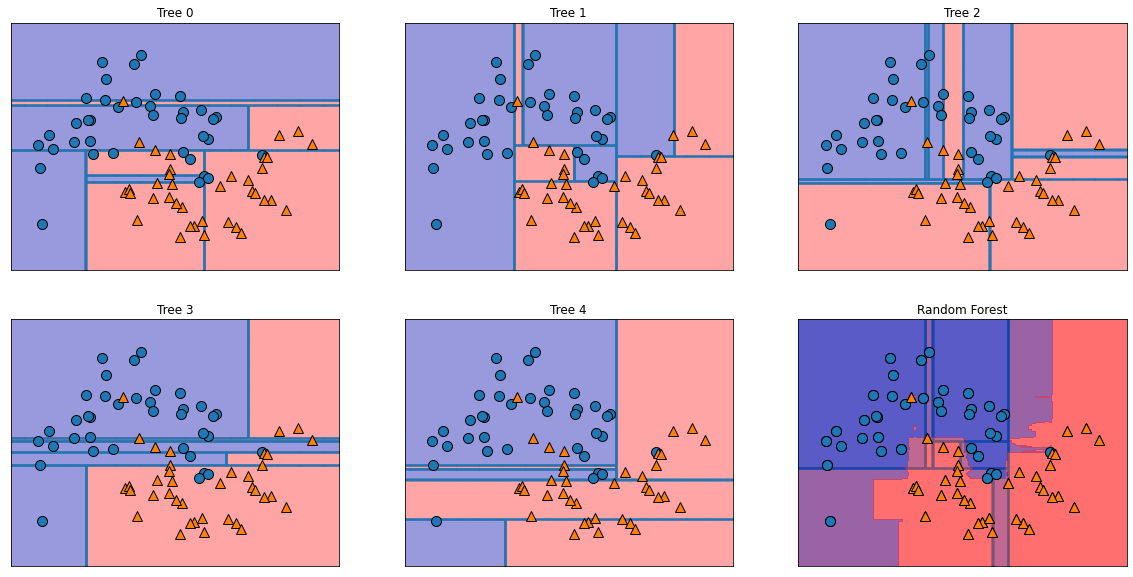

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Последний график (границы принятия решений) - Random Forest - получен путем усреднения пяти спрогнозированных вероятностей

На рисунках отчетливо видно, что границы принятия решений,
полученные с помощью пяти деревьев, существенно различаются между
собой:
- Каждое дерево совершает ряд ошибок, поскольку из-за бутстрепа
некоторые точки исходного обучающего набора фактически не были
включены в обучающие наборы, по которым строились деревья
- В отличие от отдельных деревьев случайный лес переобучается в
меньшей степени и дает гораздо более чувствительную (гибкую) границу
принятия решений
- В реальных примерах используется гораздо большее
количество деревьев (часто сотни или тысячи), что приводит к
получению еще более чувствительной границы

В качестве еще одного примера давайте построим случайный лес,
состоящий из 100 деревьев, на наборе данных Breast Cancer:

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
# По моим подсчетам при max_depth=7 правильность на тестовом наборе будет максимальной
forest.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972


Без настройки каких-либо параметров случайный лес дает нам
правильность 97%, это лучше результата линейных моделей или
одиночного дерева решений. 

Как и дерево решений, случайный лес позволят вычислить важности
признаков, которые рассчитываются путем агрегирования значений
важности по всем деревьям леса. Как правило, важности признаков,
вычисленные случайным лесом, являются более надежным показателем,
чем важности, вычисленные одним деревом.

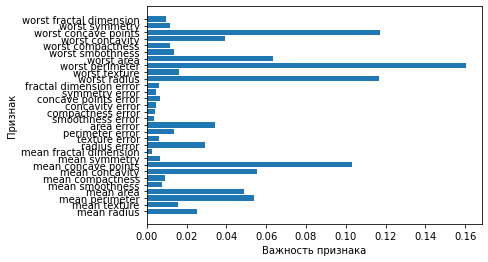

In [57]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(forest)

На рисунке видно, что в отличие от одиночного дерева решения
случайный лес вычисляет ненулевые значения важностей для гораздо
большего числа признаков. Случайность, лежащая в основе случайного леса, заставляет
алгоритм рассматривать множество возможных интерпретаций. Это
приводит к тому, что случайный лес дает гораздо более широкую картину
данных, чем одиночное дерево.

#### Преимущества, недостатки и параметры

В настоящее время случайные леса регрессии и классификации являются
одним из наиболее широко используемых методов машинного обучения:
- Они обладают высокой прогнозной силой, часто дают хорошее качество
модели без утомительной настройки параметров и не требуют
масштабирования данных.
- Случайные леса обладают всеми преимуществами деревьев
решений, хотя и не лишены некоторых их недостатков
- Случайный лес по своей природе является
рандомизированным алгоритмом и установка различных стартовых
значений генератора псевдослучайных чисел (или вообще отказ от
использования random_state) может кардинально изменить построение
модели. Чем больше деревьев в лесу, тем более устойчивым он будет к
изменению стартового значения.
- Случайный лес плохо работает на данных очень высокой размерности,
разреженных данных, например, на текстовых данных. (Для подобного
рода данных линейные модели подходят больше.)
- Случайный лес, как
правило, хорошо работает даже на очень больших наборах данных, и
обучение могут легко распараллелить между многочисленными
процессорными ядрами в рамках мощного компьютера.
- Важными параметрами настройки являются n_estimators,
max_features и опции предварительной обрезки деревьев, например,
max_depth.
- Большее значение n_estimators всегда дает
лучший результат. Общее правило
заключается в том, чтобы построить «столько деревьев, сколько позволяет ваше
время и память».
- Как было описано ранее, max_features случайным образом определяет
признаки, использующиеся при разбиении в каждом дереве, а меньшее
значение max_features уменьшает переобучение. В общем, лучше взять за правило использовать значения, выставленные по умолчанию: max_features = sqrt(n_features) для классификации и
max_features = n_features для регрессии. Увеличение значений
max_features или max_leaf_nodes иногда может повысить качество
модели. Кроме того, оно может резко снизить требования к пространству
на диске и времени вычислений в ходе обучения и прогнозирования.

Одна из причин,
в силу которой деревья решений еще используются до сих пор, – это
компактное представление процесса принятия решений. Детальная
интерпретация десятков или сотен деревьев нвозможна в принципе, и,
как правило, деревья в случайном лесе получаются более глубокими по
сравнению с одиночными деревьями решений (из-за использования
подмножеств признаков). Поэтому, если вам нужно в сжатом виде
визуализировать процесс принятия решений для неспециалистов,
одиночное дерево решений может быть оптимальным выбором.

Параметр n_jobs используется для настройки количества используемых ядер (ядро) компьютера. Пример:
- RandomForestClassifier(n_estimators=1500, random_state=2, n_jobs = -1) (Значение -1 задействует все ядра компьютера)

### Градиентный бустинг деревьев регрессии (машины градиентного бустинга)

Градиентный бустинг деревьев регрессии – еще один ансамблевый метод,
который объединяет в себе множество деревьев для создания более
мощной модели. 
- Несмотря на слово «регрессия» в названии, эти модели
можно использовать для регрессии и классификации.
- Градиентный бустинг строит последовательность
деревьев, в которой каждое дерево пытается исправить ошибки
предыдущего.
- По умолчанию в градиентном бустинге деревьев регрессии
отсутствует случайность, вместо этого используется строгая
предварительная обрезка
- В градиентном бустинге деревьев часто
используются деревья небольшой глубины, от одного до пяти уровней
- Основная идея градиентного бустинга заключается в объединении
множества простых моделей (в данном контексте известных под
названием слабые ученики или weak learners), деревьев небольшой
глубины. Каждое дерево может дать хорошие прогнозы только для части
данных и таким образом для итеративного улучшения качества
добавляется все большее количество деревьев.

Помимо предварительной обрезки и числа деревьев в ансамбле, еще
один важный параметр градиентного бустинга – это learning_rate (скорость
обучения),
который контролирует, насколько сильно каждое дерево будет пытаться
исправить ошибки предыдущих деревьев.
- Более высокая скорость
обучения означает, что каждое дерево может внести более сильные
корректировки и это позволяет получить более сложную модель.

Добавление большего количества деревьев в ансамбль, осуществляемое
за счет увеличения значения n_estimators, также увеличивает сложность
модели, поскольку модель имеет больше шансов исправить ошибки на
обучающем наборе.

In [58]:
# Ниже приведен пример использования GradientBoostingClassifier
# на наборе данных Breast Cancer. По умолчанию используются 100
# деревьев c максимальной глубиной 3 и скорости обучения 0.1:

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.965


Поскольку правильность на обучающем наборе составляет 100%, мы,
вероятно, столкнулись с переобучением. Для уменьшения переобучения
мы можем либо применить более сильную предварительную обрезку,
ограничив максимальную глубину, либо снизить скорость обучения:

In [59]:
# Уменьшим глубину до 1

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.972


In [60]:
# Уменьшим скорость обучения до 0.01, чтобы уменьшить корректировку

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.965


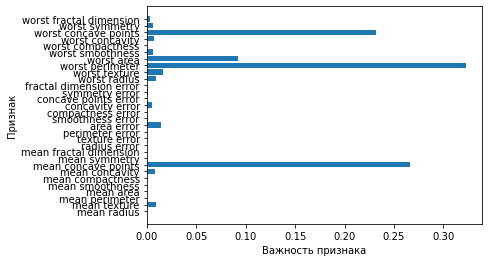

In [61]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(gbrt)

Поскольку и градиентный бустинг и случайный лес хорошо работают
на одних и тех же данных, общераспространенный подход заключается в
том, чтобы:
- сначала попытаться построить случайный лес, который дает
вполне устойчивые результаты.
- Если случайный лес дает хорошее
качество модели, однако время, отводимое на прогнозирование, на вес
золота или важно выжать из модели максимальное значение
правильности, выбор в пользу градиентного бустинга часто помогает
решить эти задачи.

Для решения
крупномасштабной задачи лучше использовать пакет xgboost и его Python-интерфейс

#### Преимущества, недостатки и параметры

- основной
недостаток градиентного бустинга заключается в том, что он требуют тщательной настройки
параметров и для обучения может потребоваться много времени
- Как и
другие модели на основе дерева, алгоритм хорошо работает на данных,
представляющих смесь бинарных и непрерывных признаков

- Основные параметры градиентного бустинга деревьев – это
количество деревьев (n_estimators) и скорость обучения
(learning_rate), контролирующая степень вклада каждого дерева в
устранение ошибок предыдущих деревьев.
- Эти два параметра тесно
взаимосвязаны между собой, поскольку более низкое значение
learning_rate означает, что для построения модели аналогичной
сложности необходимо большее количество деревьев.
- В отличие от
случайного леса, в котором более высокое значение n_estimators всегда
дает лучшее качество, увеличение значения n_estimators в градиентном
бустинге дает более сложную модель, что может привести к
переобучению.
- Другим важным параметром является параметр max_depth (или, как
альтернатива, max_leaf_nodes), направленный на уменьшение сложности
каждого дерева. Обычно для моделей градиентного бустинга значение
max_depth устанавливается очень низким, как правило. не больше пяти
уровней.

Общепринятая практика – подгонять n_estimators в
зависимости от бюджета времени и памяти, а затем подбирать различные
значения learning_rate.

## Ядерный метод опорных векторов

Ядерный метод опорных векторов (часто
его просто называют SVM) – это расширение метода опорных векторов,
оно позволяет получать более сложные модели, которые не сводятся к
построению простых гиперплоскостей в пространстве.
Несмотря на то
что метод опорных векторов можно применять для задач классификации
и регрессии, мы ограничимся классификацией, реализованной в SVC.
Аналогичные принципы применяются в опорных векторах для регрессии
и реализованы в SVR.

### Линейные модели и нелинейные признаки

Один из способов
сделать линейную модель более гибкой – добавить новые признаки,
например, добавить взаимодействия или полиномы входных признаков.

Text(0, 0.5, 'Признак 1')

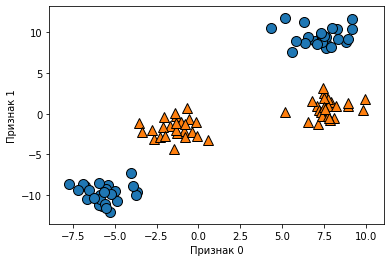

In [62]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

D:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Признак 1')

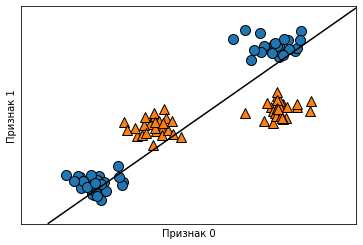

In [63]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Теперь давайте расширим набор входных признаков, скажем, добавим
в качестве нового признака feature1 ** 2, квадрат второго признака.
Теперь каждую точку данных мы представим не в виде точки двумерного
пространства (feature0, feature1), а виде точки трехмерного
пространства (feature0, feature1, feature1 ** 2).

C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_19856/855106305.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'признак1 ** 2')

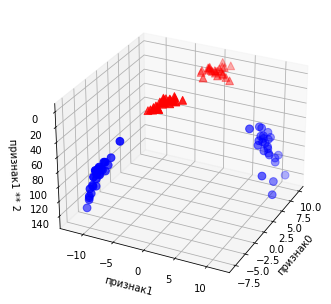

In [64]:
# добавляем второй признак, возведенный в квадрат
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# визуализируем в 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# сначала размещаем на графике все точки с y == 0, затем с y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2")

В новом представлении данных уже можно отделить два класса друг
от друга, используя линейную модель, плоскость в трехмерном
пространстве. Мы можем убедиться в этом, подогнав линейную модель к
дополненным данным:

D:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_19856/1615430027.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

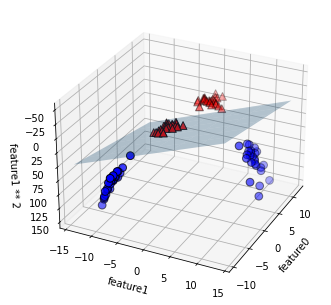

In [65]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Фактически модель линейного SVM как функция исходных
признаков не является больше линейной. Это не линия, а скорее эллипс,
как можно увидеть на графике, построенном ниже

Text(0, 0.5, 'Признак 1')

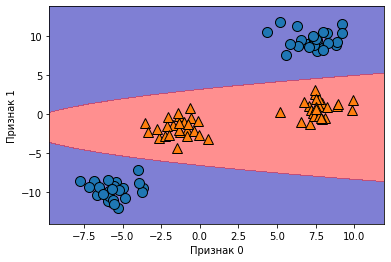

In [66]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

### "Ядерный трюк" 

Добавление нелинейных
признаков может улучшить прогнозную силу линейной модели.

«Ядерный трюк» (kernel trick)
непосредственно вычисляет евклидовы расстояния (более точно,
скалярные произведения точек данных), чтобы получить расширенное
пространство признаков без фактического добавления новых признаков.

Существуют два способа поместить данные в высокоразмерное
пространство, которые чаще всего используются методом опорных
векторов:
- Полиномиальное ядро, которое вычисляет все возможные
полиномиальные комбинации исходных признаков до определенной
степени.
- Ядро RBF (радиальная базисная функция), также известное
как гауссовское ядро. Гауссовское ядро немного сложнее объяснить,
поскольку оно соответствует бесконечному пространству признаков. Объяснить гауссовское ядро можно так: оно рассматривает все возможные полиномы всех степеней, однако важность признаков
снижается с возрастанием степени.

### Понимание принципов работы SVM

В ходе обучения SVM вычисляет важность каждой точки обучающих
данных с точки зрения определения решающей границы между двумя
классами. Обычно лишь часть точек обучающего набора важна для
определения границы принятия решений: точки, которые лежат на
границе между классами. Они называются опорными векторами (support
vectors
) и дали свое название машине опорных векторов.

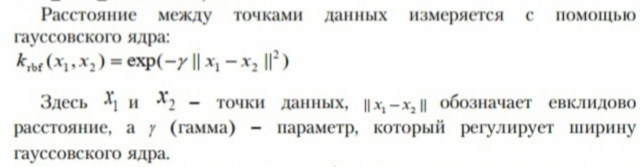

Text(0, 0.5, 'Признак 1')

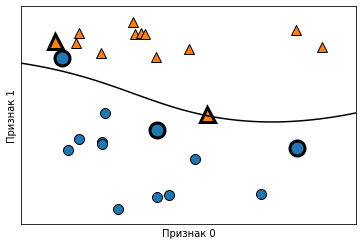

In [67]:
# kernel='rbf' - тип ядра

from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# размещаем на графике опорные векторы
sv = svm.support_vectors_
# метки классов опорных векторов определяются знаком дуальных коэффициентов
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

# Жирные точки это опорные векторы

В данном случае SVM дает очень гладкую и нелинейную (непрямую)
границу. Здесь мы скорректировали параметр C и параметр gamma.

### Настройка параметров SVM

- Параметр gamma – это параметр формулы, приведенной в предыдущем
разделе. Он регулирует ширину гауссовского ядра. Параметр gamma
задает степень близости расположения точек. 
- Параметр С представляет
собой параметр регуляризации, аналогичный тому, что использовался в
линейных моделях. Он ограничивает важность каждой точки (точнее, ее
dual_coef_).

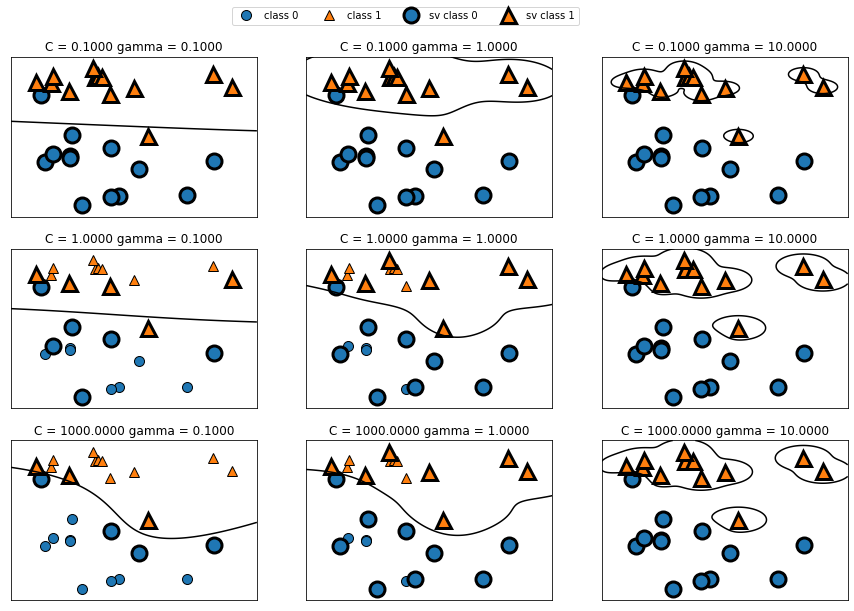

In [68]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

Gamma:
- Небольшое значение gamma соответствует большому
радиусу гауссовского ядра
- Низкое значение gamma
означает медленное изменение решающей границы, которое дает модель
низкой сложности
- Высокое значение gamma дает более
сложную модель

C:
- Как и в случае с линейными моделями, небольшое значение C
соответствует модели с весьма жесткими ограничениями

Давайте применим SVM c RBF-ядром к набору данных Breast Cancer.
По умолчанию используются C=1 и gamma=1/n_features:

In [69]:
# Видимо в новой версии Python установлено другое значение gamma по умолчанию
# т.к. у меня вышел другой ответ при компиляции без указания параметров
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

n_features = cancer.data.shape[1]

svc = SVC(C = 1, gamma = 1/n_features)
svc.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))

Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 0.63


Хотя SVM часто дает хорошее качество модели, он очень чувствителен к
настройкам параметров и масштабированию данных. В частности, SVM
требует, чтобы все признаки были измерены в одном и том же масштабе.
Давайте посмотрим на минимальное и максимальное значения каждого
признака в log-пространстве:

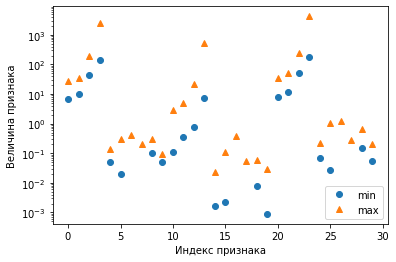

In [70]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Индекс признака")
plt.ylabel("Величина признака")
plt.yscale("log")

Такой же график только с boxplot:

Text(0, 0.5, 'Feature magnitude')

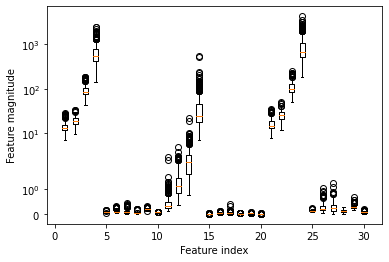

In [71]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

Исходя из этого графика, мы можем заключить, что признаки в наборе
данных Breast Cancer имеют совершенно различные порядки величин.
Для ряда моделей (например, для линейных моделей) данный факт
может быть в некоторой степени проблемой, однако для ядерного SVM
он будет иметь разрушительные последствия.

### Предварительная обработка данных для SVM

- Один из способов решения этой проблемы – масштабирование (нормирование) всех
признаков таким образом, чтобы все они имели примерно один и тот же
масштаб. 
- Общераспространенный метод масштабирования для ядерного
SVM заключается в масштабировании данных так, чтобы все признаки
принимали значения от 0 до 1. 
- Мы увидим, как это делается с помощью
метода предварительной обработки MinMaxScaler в главе 3, в которой
дадим более подробную информацию. А сейчас давайте сделаем это
«вручную»:

In [72]:
# вычисляем минимальное значение для каждого признака обучающего набора
min_on_training = X_train.min(axis=0)
# вычисляем ширину диапазона для каждого признака (max - min) обучающего набора
range_on_training = (X_train - min_on_training).max(axis=0)
# вычитаем минимальное значение и затем делим на ширину диапазона
# min=0 и max=1 для каждого признака
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Минимальное значение для каждого признака\n{}".format(X_train_scaled.min(axis=0)))
print("Максимальное значение для каждого признака\n {}".format(X_train_scaled.max(axis=0)))

Минимальное значение для каждого признака
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Максимальное значение для каждого признака
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [73]:
# используем ТО ЖЕ САМОЕ преобразование для тестового набора,
# используя минимум и ширину диапазона из обучающего набора (см. главу 3)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [74]:
svc = SVC(C = 1, gamma = 1/n_features)
svc.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.948
Правильность на тестовом наборе: 0.951


Масштабирование данных привело к огромной разнице!
Мы можем попытаться
увеличить С или gamma, чтобы подогнать более сложную модель.

In [75]:
svc = SVC(C=1000, gamma = 1/n_features)
svc.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972


### Преимущества, недостатки и параметры

- Ядерный метод опорных векторов – это модели, обладающие мощной
прогнозной силой и хорошо работающие на различных наборах данных. Они хорошо работают на
низкоразмерных и высокоразмерных данных (то есть когда у нас мало
или, наоборот, много признаков), однако плохо масштабируются с
ростом объема данных. Запуск SVM на наборе данных объемом 10000
наблюдений не составляет проблем, однако работа с наборами данных
объемом 100000 наблюдений и больше может стать сложной задачей с
точки зрения времени вычислений и использования памяти.
- Другим недостатком является то, что SVM требует тщательной
предварительной обработки данных и настройки параметров. Кроме того, модели SVM трудноисследуемы, тяжело понять, почему был сделан именно такой
прогноз и довольно сложно объяснить модель неспециалисту.
- Однако все же стоит попробовать SVM, особенно в тех случаях, когда
все ваши признаки имеют одинаковые единицы измерения (например,
все признаки являются интенсивностями пикселей) и измерены в одном
и том же масштабе.
- Важными параметрами ядерного SVM являются параметр
регуляризации C, тип ядра, а также параметры, определяемые ядром.
Хотя мы в основном сосредоточились на ядре RBF, в scikit-learn
доступны и другие типы ядер. 
- Ядро RBF имеет лишь один параметр
gamma, который является обратной величиной ширины гауссовского ядра.
gamma и С регулируют сложность модели, более высокие значения этих
параметров дают более сложную модель. Таким образом, оптимальные
настройки обоих параметров, как правило, сильно взаимосвязаны между
собой и поэтому С и gamma должны быть отрегулированы вместе.

## Нейронные сети (глубокое обучение)

Многослойные персептроны для классификации и
регрессии могут служить отправной точкой в изучении более
сложных методов машинного обучения. Многослойные персептроны
(MLP) также называют простыми (vanilla) нейронными сетями прямого
распространения, а иногда и просто нейронными сетями.

### Модель нейронной сети

MLP можно рассматривать как обобщение линейных моделей, которое
прежде чем прийти к решению выполняет несколько этапов обработки
данных.

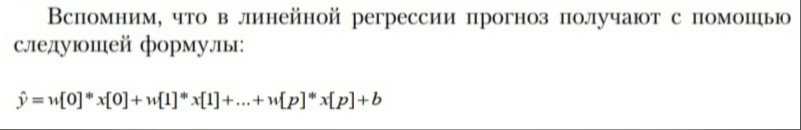

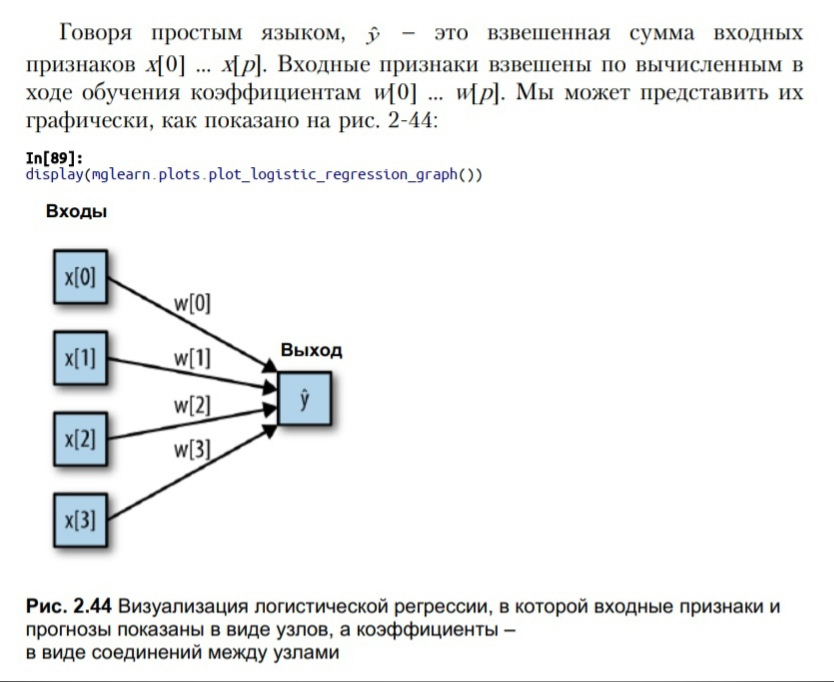

В MLP процесс вычисления взвешенных сумм повторяется несколько
раз. Сначала вычисляются скрытые элементы (hidden units), которые
представляют собой промежуточный этап обработки. Они вновь
объединяются с помощью взвешенных сумм для получения конечного
результата (рис. 2.45)

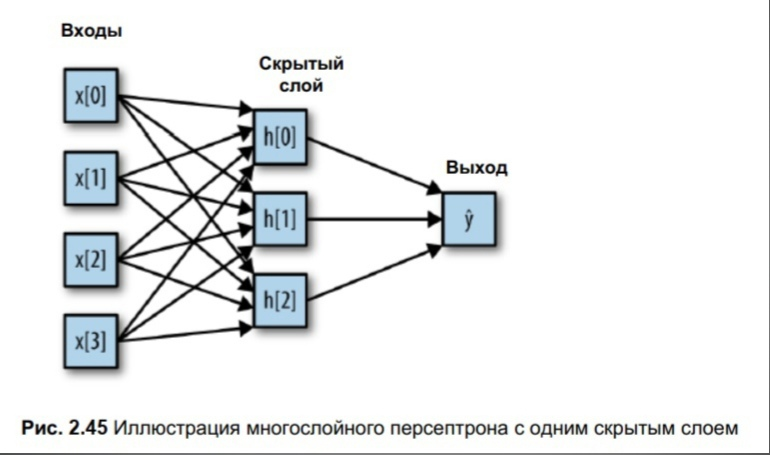

У этой модели гораздо больше вычисляемых коэффициентов (также
называемых весами):
- коэффициент между каждым входом и каждым
скрытым элементом (которые образуют скрытый слой или hidden layer)
- коэффициент между каждым элементом скрытого слоя и выходом

С математической точки зрения вычисление серии взвешенных сумм –
это то же самое, что вычисление лишь одной взвешенной суммы, таким
образом, чтобы эта модель обладала более мощной прогнозной силой,
чем линейная модель, нам нужен один дополнительный трюк

Поясним
трюк на примере нейронной сети с одним скрытым слоем:
- Входной слой
просто передает входы скрытому слою сети, либо без преобразования,
либо выполнив сначала стандартизацию входов. 
- Затем происходит
вычисление взвешенной суммы входов для каждого элемента скрытого
слоя, к ней применяется функция активации – обычно используются
нелинейные функции выпрямленный линейный элемент (rectified linear
unit или relu) или гиперболический тангенс (hyperbolic tangent или tanh).
- В итоге получаем выходы нейронов скрытого слоя. Эти промежуточные
выходы могут считаться нелинейными преобразованиями и
комбинациями первоначальных входов. Они становятся входами
выходного слоя.
- Снова вычисляем взвешенную сумму входов, применяем
функцию активации и получаем итоговые значения целевой переменной.

Функции активации relu и tanh показаны на рис. 2.46. Relu отсекает
значения ниже нуля, в то время как tanh принимает значения от –1 до 1
(соответственно для минимального и максимального значений входов).
Любая из этих двух нелинейных функций позволяет нейронной сети в отличие от линейной модели вычислять гораздо более сложные
зависимости.

Text(0, 0.5, 'relu(x), tanh(x)')

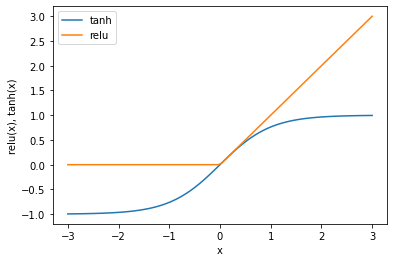

In [76]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
# Рис. 2.46 Функция активации гиперболический тангенс
# и функция активации выпрямленного линейного элемента

Здесь w – веса между входом х и скрытом слоем h, а v – весовые
коэффициенты между скрытым слоем h и выходом yˆ . Веса v и w
вычисляются по данным, х являются входными признаками, yˆ -
вычисленный выход, а h – промежуточные вычисления. 

Здесь w – веса между входом х и скрытом слоем h, а v – весовые
коэффициенты между скрытым слоем h и выходом yˆ . Веса v и w
вычисляются по данным, х являются входными признаками, yˆ -
вычисленный выход, а h – промежуточные вычисления. 
например, 10000 для очень сложных данных. Кроме того, можно добавить
дополнительные скрытые слои.

### Настройка нейронных сетей

Text(0, 0.5, 'Признак 1')

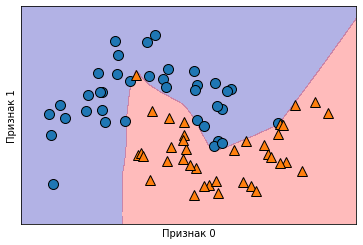

In [77]:
# Применим MLPClassifier к набору данных two_moons:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

По умолчанию MLP использует 100 скрытых узлов, что довольно
много для этого небольшого набора данных. Мы можем уменьшить число
(что снизит сложность модели) и снова получить хороший результат

D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Признак 1')

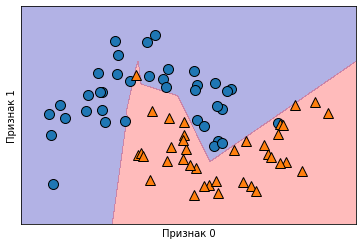

In [78]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])

mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

При использовании лишь 10 скрытых элементов граница принятия
решений становится более неровной. При использовании
одного скрытого слоя решающая функция будет состоять из 10
прямолинейных отрезков.

- По умолчанию используется
функция активации relu
-  Если необходимо получить более гладкую
решающую границу, можно добавить большее количество скрытых
элементов (как показано на рис. 2.49), добавить второй скрытый слой
(рис. 2.50), или использовать функцию активации tanh (рис. 2.51):

Text(0, 0.5, 'Признак 1')

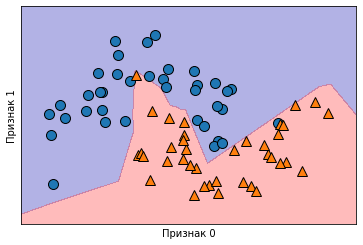

In [79]:
# использование двух скрытых слоев по 10 элементов в каждом
mlp = MLPClassifier(solver='lbfgs', random_state=0,
    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Признак 1')

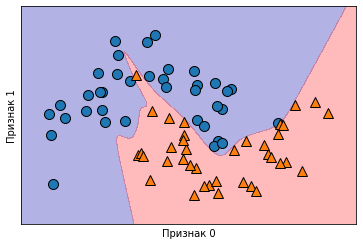

In [80]:
# использование двух скрытых слоев по 10 элементов в каждом, на этот раз с функцией tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

И, наконец, мы можем дополнительно настроить сложность
нейронной сети с помощью l2 штрафа, чтобы сжать весовые
коэффициенты до близких к нулю значений, как мы это делали в
гребневой регрессии и линейных классификаторов. В MLPClassifier за
это отвечает параметр alpha (как и в моделях линейной регрессии), и по умолчанию установлено очень низкое значение (небольшая
регуляризация). На рис. 2.52 показаны результаты применения к набору
данных two_moons различных значений alpha с использованием двух
скрытых слоев с 10 или 100 элементами в каждом:

D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


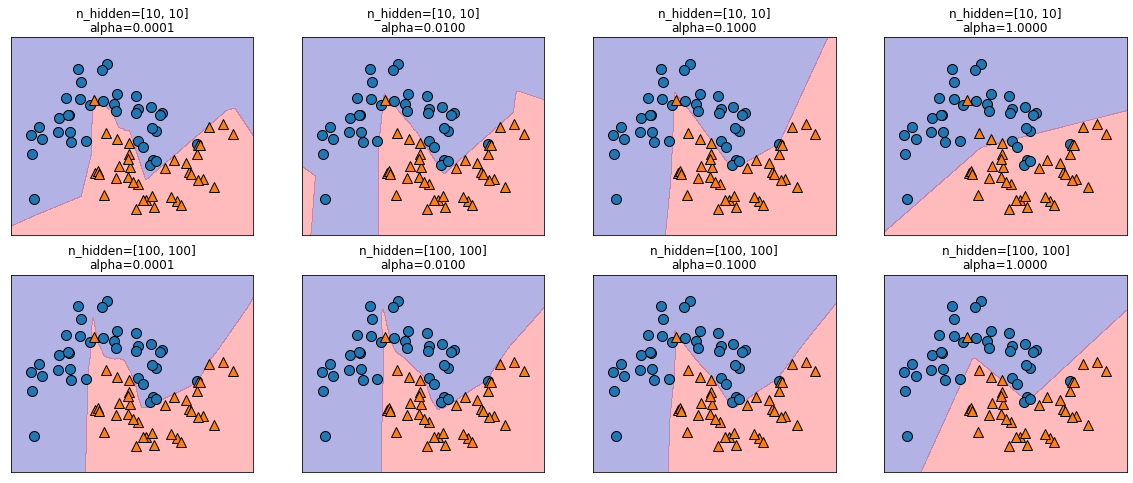

In [81]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))

существуют различные способы
регулировать сложность нейронной сети (На самом деле их гораздо больше, но мы не будем здесь вдаваться в
подробности.): 
- количество скрытых слоев,
- количество элементов в каждом скрытом слое
- регуляризация (alpha).


Важным свойством нейронных сетей является то, что их веса
задаются случайным образом перед началом обучения и случайная
инициализация влияет на процесс обучения модели. Это означает, что
даже при использовании одних и тех же параметров мы можем получить
очень разные модели, задавая разные стартовые значения генератора
псевдослучайных чисел. При условии, что сеть имеет большой размер и
ее сложность настроена правильно, данный факт не должен сильно
влиять на правильность, однако о нем стоит помнить (особенно при
работе с небольшими сетями).

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train)))
print("Правильности на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.94
Правильности на тестовом наборе: 0.92


- MLP демонстрирует довольно неплохую правильность, однако не
столь хорошую, если сравнивать с другими моделями. Как и в
предыдущем примере с SVC, это, вероятно, обусловлено масштабом
данных.
- Нейронные сети также требуют того, чтобы все входные
признаки были измерены в одном и том же масштабе, в идеале они
должны иметь среднее 0 и дисперсию 1. Мы должны отмасштабировать
наши данные так, чтобы они отвечали этим требованиям. 
- Опять же, мы
будем делать это вручную, однако в главе 3 расскажем, как это делать
автоматически с помощью StandardScaler.

In [83]:
# Ручной StandardScaler для cancer

# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis=0)
# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение
# обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.965


D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


После масштабирования результаты стали намного лучше и теперь
уже вполне могут конкурировать с результатами остальных моделей.
Впрочем, мы получили предупреждение о том, что достигнуто
максимальное число итераций. Оно является неотъемлемой частью
алгоритма adam и сообщает нам о том, что мы должны увеличить число
итераций:

In [84]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972


Переобучение. Увеличим параметр alpha (довольно сильно с 0.0001 до 1), чтобы
применить к весам более строгую регуляризацию:

In [85]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972


Следующий график
(рис. 2.54) показывает весовые коэффициенты, которые были вычислены
при подключении входного слоя к первому скрытому слою. Строки в
этом графике соответствуют 30 входным признакам, а столбцы – 100
скрытым элементам. Светлые цвета соответствуют высоким
положительным значениям, в то время как темные цвета соответствуют
отрицательным значениям:

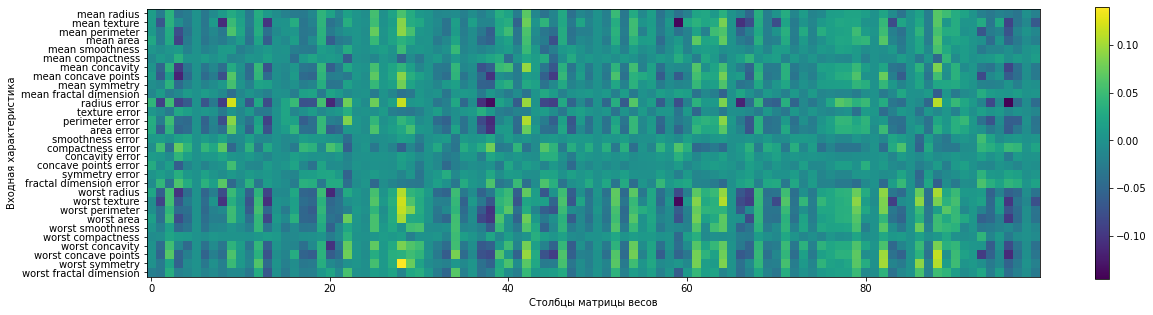

In [86]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Столбцы матрицы весов")
plt.ylabel("Входная характеристика")
plt.colorbar()

### Преимущества, недостатки и параметры

Преимущества:
- Они способны обрабатывать
информацию, содержащуюся в больших объемах данных
- Строить
невероятно сложные модели

При наличии достаточного времени
вычислений, данных и тщательной настройки параметров нейронные
сети часто превосходят другие алгоритмы машинного обучения (для
задач классификации и регрессия).

Недостатки:
- Нейронные сети, особенно крупные
нейронные сети, как правило, требуют длительного времени обучения.
- Они также требуют тщательной предварительной
обработки данных.

#### Оценка сложности в нейронных сетях

- Наиболее важными параметрами являются ряде слоев и число скрытых
блоков в одном слое. Вы должны начать с одного или двух скрытых слоев, а далее, возможно, увеличивать их число.
- Полезным показателем, позволяющим судить о сложности нейронной
сети, является количество вычисляемых в ходе обучения весов или
коэффициентов.
- Общераспространенный способ настройки параметров в нейронной
сети – сначала построить сеть достаточно большого размера, чтобы она
обучилась. Затем, убедившись в том, что сеть может обучаться, сжимаете
веса сети или увеличиваете alpha, чтобы добавить регуляризацию,
которая улучшит обобщающую способность.

# Оценки неопределенности для классификаторов

Часто вас интересует не только класс, спрогнозированный
моделью для определенной точки тестового набора, но и степень
уверенности модели в правильности прогноза. Представьте себе медицинский тест для определения рака:
- Ложно
положительный прогноз может привести к проведению дополнительных
исследований
- Ложно отрицательный прогноз может привести
к пропуску серьезной болезни

В scikit-learn существует две различные функции, с помощью
которых можно оценить неопределенность прогнозов: 
- decision_function
- predict_proba.

In [87]:
# Построим классификатор GradientBoostingClassifier, который позволяет
# использовать как метод decision_function, так и метод predict_proba:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# мы переименовываем классы в «blue» и «red» для удобства
y_named = np.array(["blue", "red"])[y]

# мы можем вызвать train_test_split с любым количеством массивов,
# все будут разбиты одинаковым образом
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)

# строим модель градиентного бустинга
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

## Решающая функция: decision_function

In [88]:
# В бинарной классификации возвращаемое значение decision_function
# имеет форму (n_samples):
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма решающей функции: {}".format(
gbrt.decision_function(X_test).shape))

Форма массива X_test: (25, 2)
Форма решающей функции: (25,)


In [89]:
# Возвращаемое значение представляет собой число с плавающей
# точкой для каждого примера:
# выведем несколько первых элементов решающей функции
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6]))

Решающая функция:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


Значение показывает, насколько сильно модель уверена в том, что
точка данных принадлежит «положительному» классу, в данном случае,
классу 1. Положительное значение указывает на предпочтение в пользу
позиционного класса, а отрицательное значение – на предпочтение в
пользу «отрицательного» (другого) класса.

In [90]:
# Мы можем судить о прогнозах, лишь взглянув на знак решающей функции.

print("Решающая функция с порогом отсечения:\n{}".format(
    gbrt.decision_function(X_test) > 0))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Решающая функция с порогом отсечения:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Прогнозы:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


Для бинарной классификации «отрицательный» класс – это всегда
первый элемент атрибута classes_, а «положительный» класс – второй
элемент атрибута classes_. Таким образом, если вы хотите полностью
просмотреть вывод метода predict, вам нужно воспользоваться
атрибутом classes_:

In [91]:
# переделаем булевы значения True/False в 0 и 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# используем 0 и 1 в качестве индексов атрибута classes_
pred = gbrt.classes_[greater_zero]

# pred идентичен выводу gbrt.predict
print("pred идентичен прогнозам: {}".format(
    np.all(pred == gbrt.predict(X_test))))

pred идентичен прогнозам: True


Диапазон значений decision_function может быть произвольным и
зависит от данных и параметров модели:

In [92]:
decision_function = gbrt.decision_function(X_test)
print("Решающая функция минимум: {:.2f} максимум: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

Решающая функция минимум: -7.69 максимум: 4.29


Это произвольное масштабирование часто затрудняет интерпретацию
вывода decision_function.

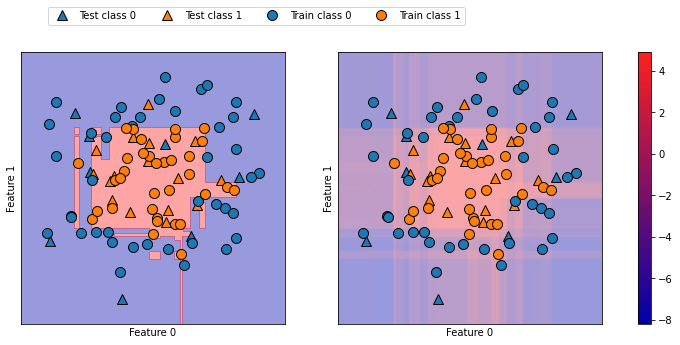

In [93]:
# Рис. 2.55 Граница принятия решений (слева) и решающая функция (справа)
# модели градиентного бустинга, построенной на двумерном синтетическом
# наборе данных
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

Рис. 2.55 Граница принятия решений (слева) и решающая функция (справа)
модели градиентного бустинга, построенной на двумерном синтетическом
наборе данных

## Прогнозирование вероятностей: predict_proba

Вывод метода predict_proba – это вероятность каждого класса и часто
его легче понять, чем вывод метода decision_function. Для бинарной
классификации он всегда имеет форму (n_samples, 2):

In [94]:
print("Форма вероятностей: {}".format(gbrt.predict_proba(X_test).shape))

Форма вероятностей: (25, 2)


Первый элемент строки – это оценка вероятности первого класса, а
второй элемент строки – это оценка вероятности второго класса.
Поскольку речь идет о вероятности, то значения в выводе predict_proba
всегда находятся в диапазоне между 0 и 1, а сумма значений для обоих
классов всегда равна 1:

In [95]:
# выведем первые несколько элементов predict_proba
print("Спрогнозированные вероятности:\n{}".format(
    gbrt.predict_proba(X_test[:6])))
# Поскольку вероятности – это числа с плавающей точкой, то маловероятно,
# что они обе будут точно равны 0.500. Однако, если это произойдет,
# то прогноз будет осуществлен случайным образом.

Спрогнозированные вероятности:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


- В предыдущем выводе видно, что большинство точек отнесены к тому
или иному классу с высокой долей определенности.
- Для переобученной модели характерна высокая доля
определенности прогнозов, даже если они и ошибочные. 
- Модель с
меньшей сложностью обычно характеризуется высокой долей
неопределенности своих прогнозов.
- Модель называется $калиброванной$ (calibrated), если вычисленная неопределенность соответствует фактической: в калиброванной модели прогноз, полученный с 70%-ной
определенностью, будет правильным в 70% случаев.

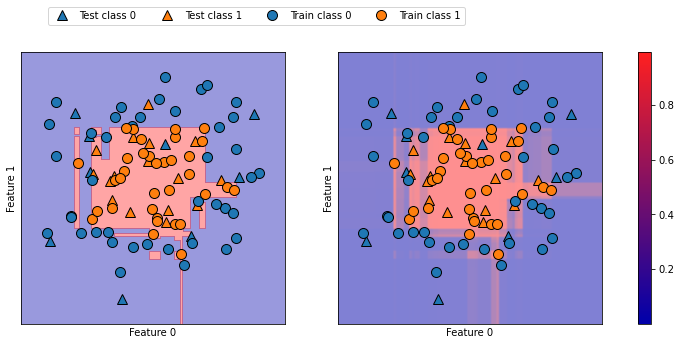

In [96]:
# границу принятия решения для набора данных, а также вероятности для класса 1:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

Рис. 2.56 Граница принятия решений (слева) спрогнозированные вероятности для
модели градиентного бустинга, показанной на рис. 2.55

## Неопределенность в мультиклассовой классификации

Сравнение различных моделей и
визуализации оценок неопределенности:

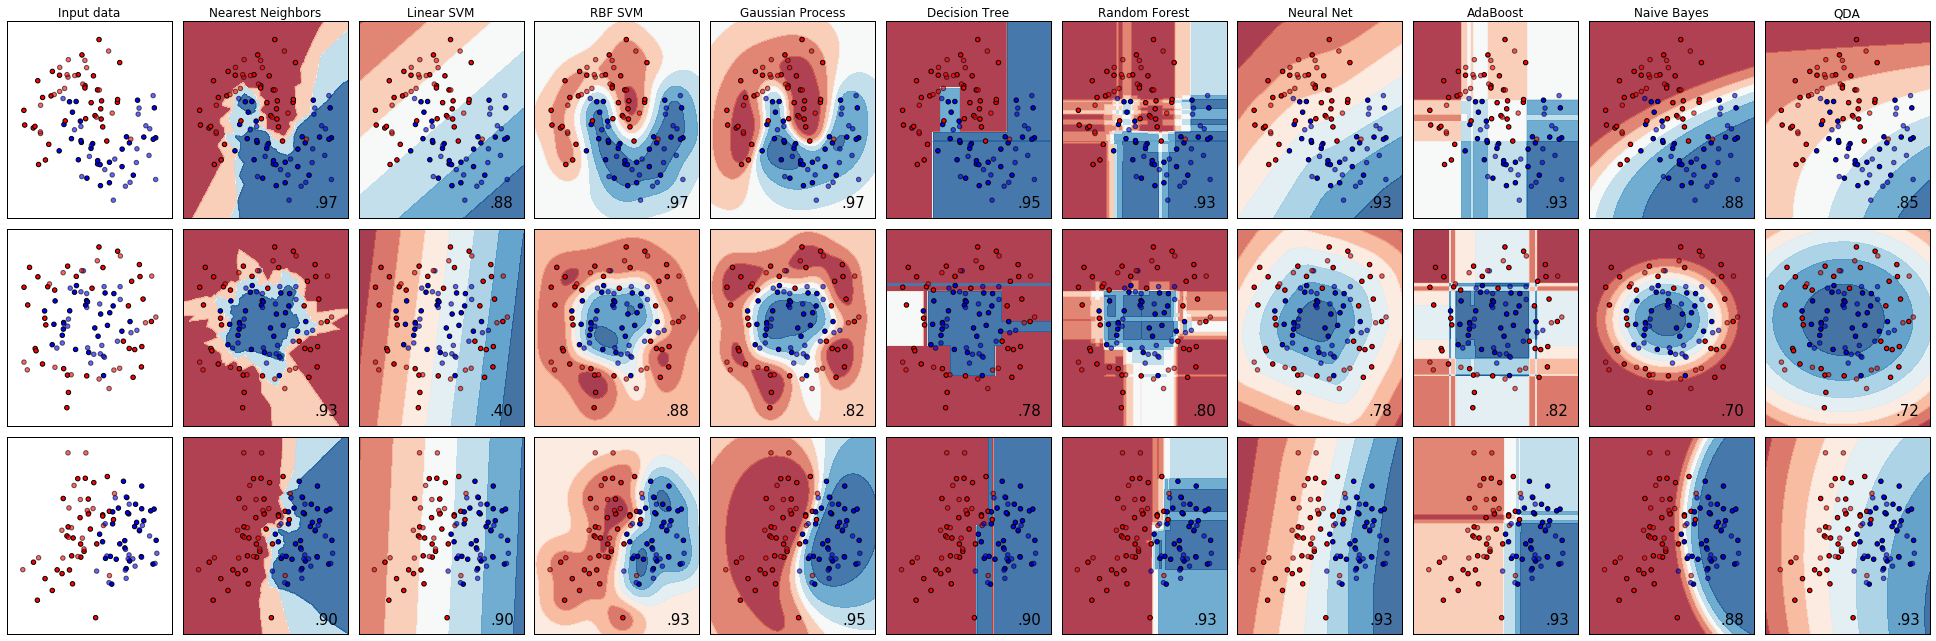

До сих пор мы говорили только об оценках неопределенности в бинарной
классификации. Однако методы decision_function и predict_proba
также можно применять в мультиклассовой классификации. Давайте
применим их к набору данных Iris, который представляет собой пример
3-классовой классификации:

In [97]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("Форма решающей функции: {}".format(gbrt.decision_function(X_test).shape))
# выведем первые несколько элементов решающей функции
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Форма решающей функции: (38, 3)
Решающая функция:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


Можно получить прогнозы, исходя из этих оценок, с помощью функции np.argmax. Она возвращает индекс
максимального элемента массива для каждой точки данных:

In [98]:
print("Argmax решающей функции:\n{}".format(
    np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Argmax решающей функции:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


Вывод predict_proba имеет точно такую же форму (n_samples,
n_classes). И снова вероятности возможных классов для каждой точки
данных дают в сумме 1:

In [99]:
# выведем первые несколько элементов predict_proba
print("Спрогнозированные вероятности:\n{}".format(gbrt.predict_proba(X_test)[:6]))

# покажем, что сумма значений в каждой строке равна 1
print("Суммы: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Спрогнозированные вероятности:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Суммы: [1. 1. 1. 1. 1. 1.]


Мы вновь можем получить прогнозы, вычислив argmax для
predict_proba:

In [100]:
print("Argmax спрогнозированных вероятностей:\n{}".format(
    np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Argmax спрогнозированных вероятностей:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [101]:
# Воспользуемся атрибутом classes_ для сравнения результатов полученных
# с помощью predict, с результатами decision_function или predict_proba:

logreg = LogisticRegression()

# представим каждое целевое значение названием класса в наборе iris
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("уникальные классы в обучающем наборе: {}".format(logreg.classes_))
print("прогнозы: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax решающей функции: {}".format(argmax_dec_func[:10]))
print("argmax объединенный с классами_: {}".format(
    logreg.classes_[argmax_dec_func][:10]))

уникальные классы в обучающем наборе: ['setosa' 'versicolor' 'virginica']
прогнозы: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax решающей функции: [1 0 2 1 1 0 1 2 1 1]
argmax объединенный с классами_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Выводы и перспективы

Слепое
применение алгоритма к данным без понимания исходных
предположений модели и принципов работы параметров редко приводит
к построению точной модели

Краткий обзор случаев использования той или
иной модели:
- Ближайшие соседи\
Подходит для небольших наборов данных, хорош в качестве базовой
модели, прост в объяснении.
- Линейные модели\
Считается первым алгоритмом, который нужно попробовать, хорош
для очень больших наборов данных, подходит для данных с очень
высокой размерностью.
- Наивный байесовский классификатор\
Подходит только для классификации. Работает даже быстрее, чем
линейные модели, хорош для очень больших наборов данных и
высокоразмерных данных. Часто менее точен, чем линейные модели.
- Деревья решений\
Очень быстрый метод, не нужно масштабировать данные, результаты
можно визуализировать и легко объяснить.
- Случайные леса\
Почти всегда работают лучше, чем одно дерево решений, очень
устойчивый и мощный метод. Не нужно масштабировать данные.
Плохо работает с данными очень высокой размерности и
разреженными данными.
- Градиентный бустинг деревьев решений\
Как правило, немного более точен, чем случайный лес. В отличие от
случайного леса медленнее обучается, но быстрее предсказывает и
требует меньше памяти. По сравнению со случайным лесом требует
настройки большего числа параметров.
- Машины опорных векторов\
Мощный метод для работы с наборами данных среднего размера и
признаками, измеренными в едином масштабе. Требует
масштабирования данных, чувствителен к изменению параметров.
- Нейронные сети\
Можно построить очень сложные модели, особенно для больших
наборов данных. Чувствительны к масштабированию данных и
выбору параметров. Большим моделям требуется много времени для
обучения.

При работе с новым набором данных лучше начать с простой модели,
например, с линейной модели, наивного байесовского классификатора
или классификатора ближайших соседей, и посмотреть, как далеко
можно продвинуться с точки зрения качества модели. Лучше изучив
данные, вы можете выбрать алгоритм, который может строить более
сложные модели, например, случайный лес, градиентный бустинг
деревьев решений, SVM или нейронную сеть.